In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/'
x1ds = np.hstack((glob.glob('{}*0_x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path)), glob.glob('{}*x1dsum.fits'.format(path))))
x1ds


array(['/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13050_sx1.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits'],
      dtype='<U70')

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13010_x1d.fits
G140M
159.60316


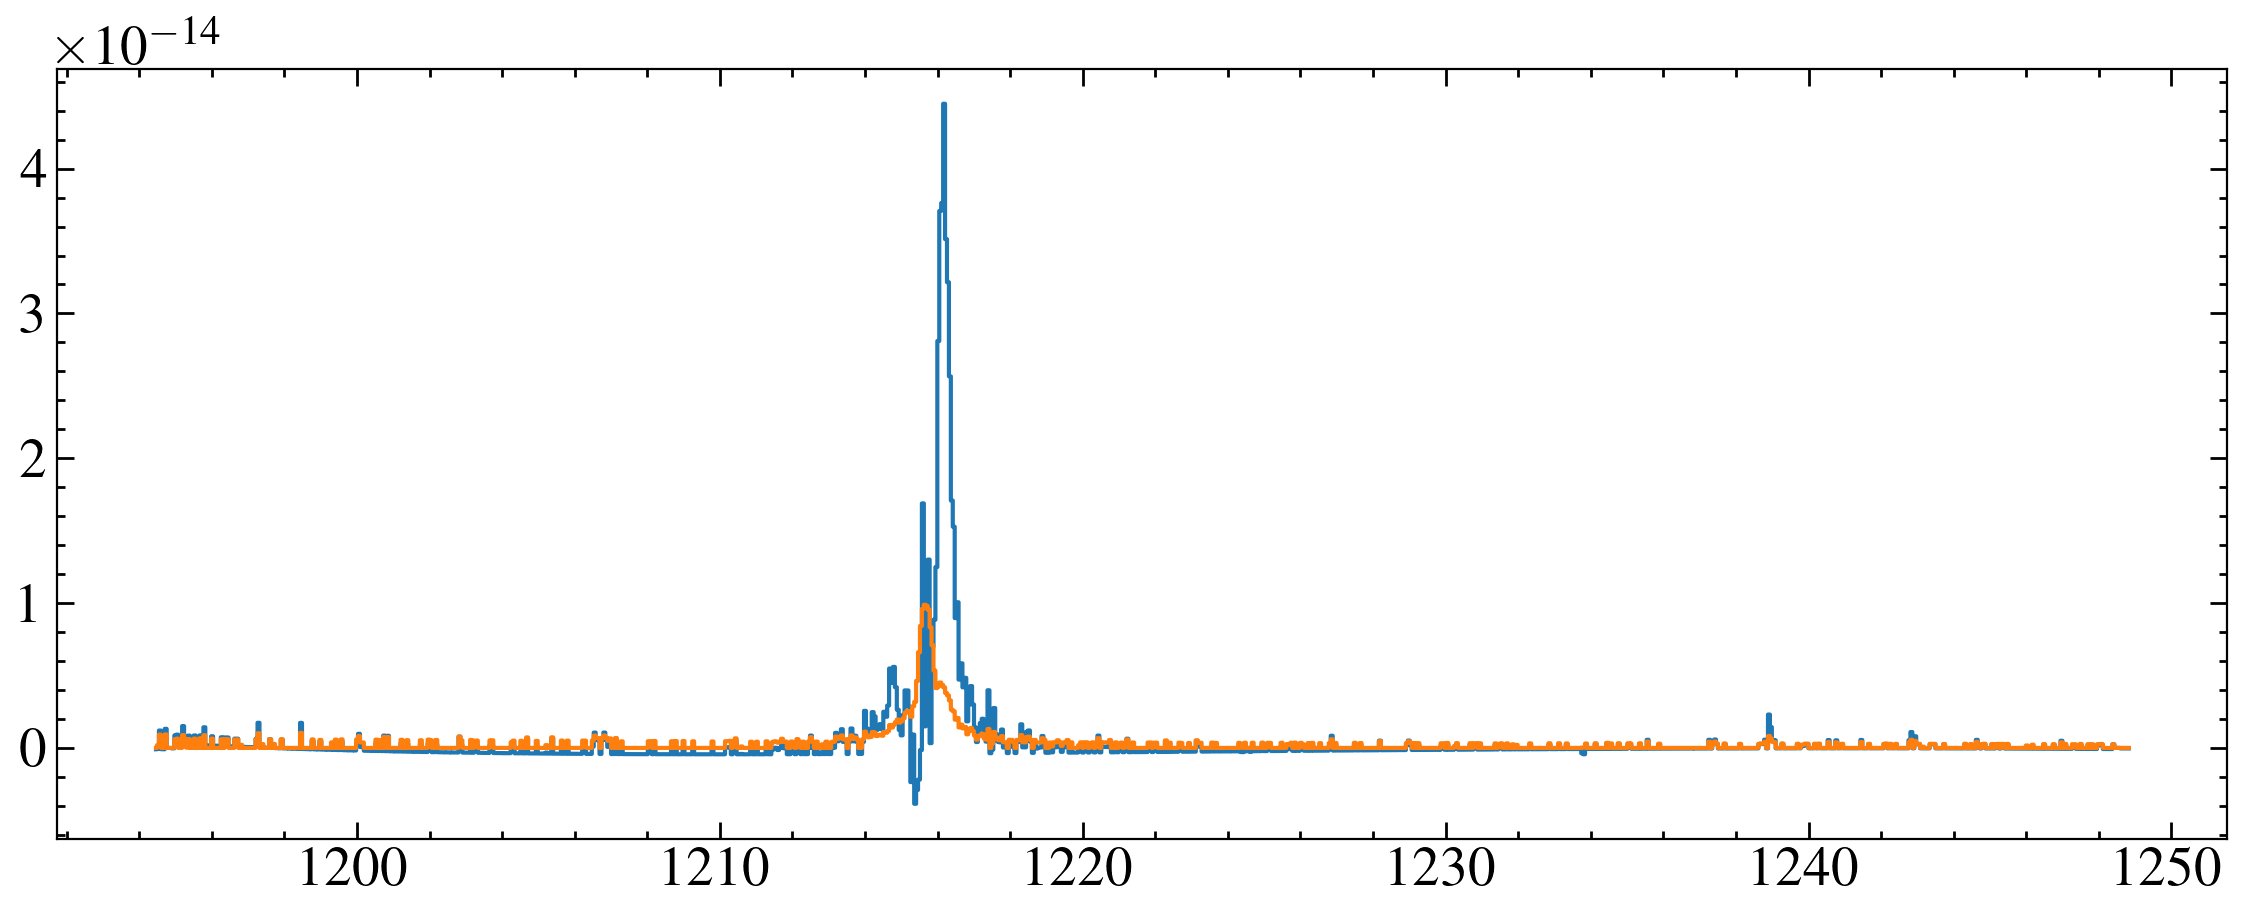

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13020_x1d.fits
G140M
159.9237


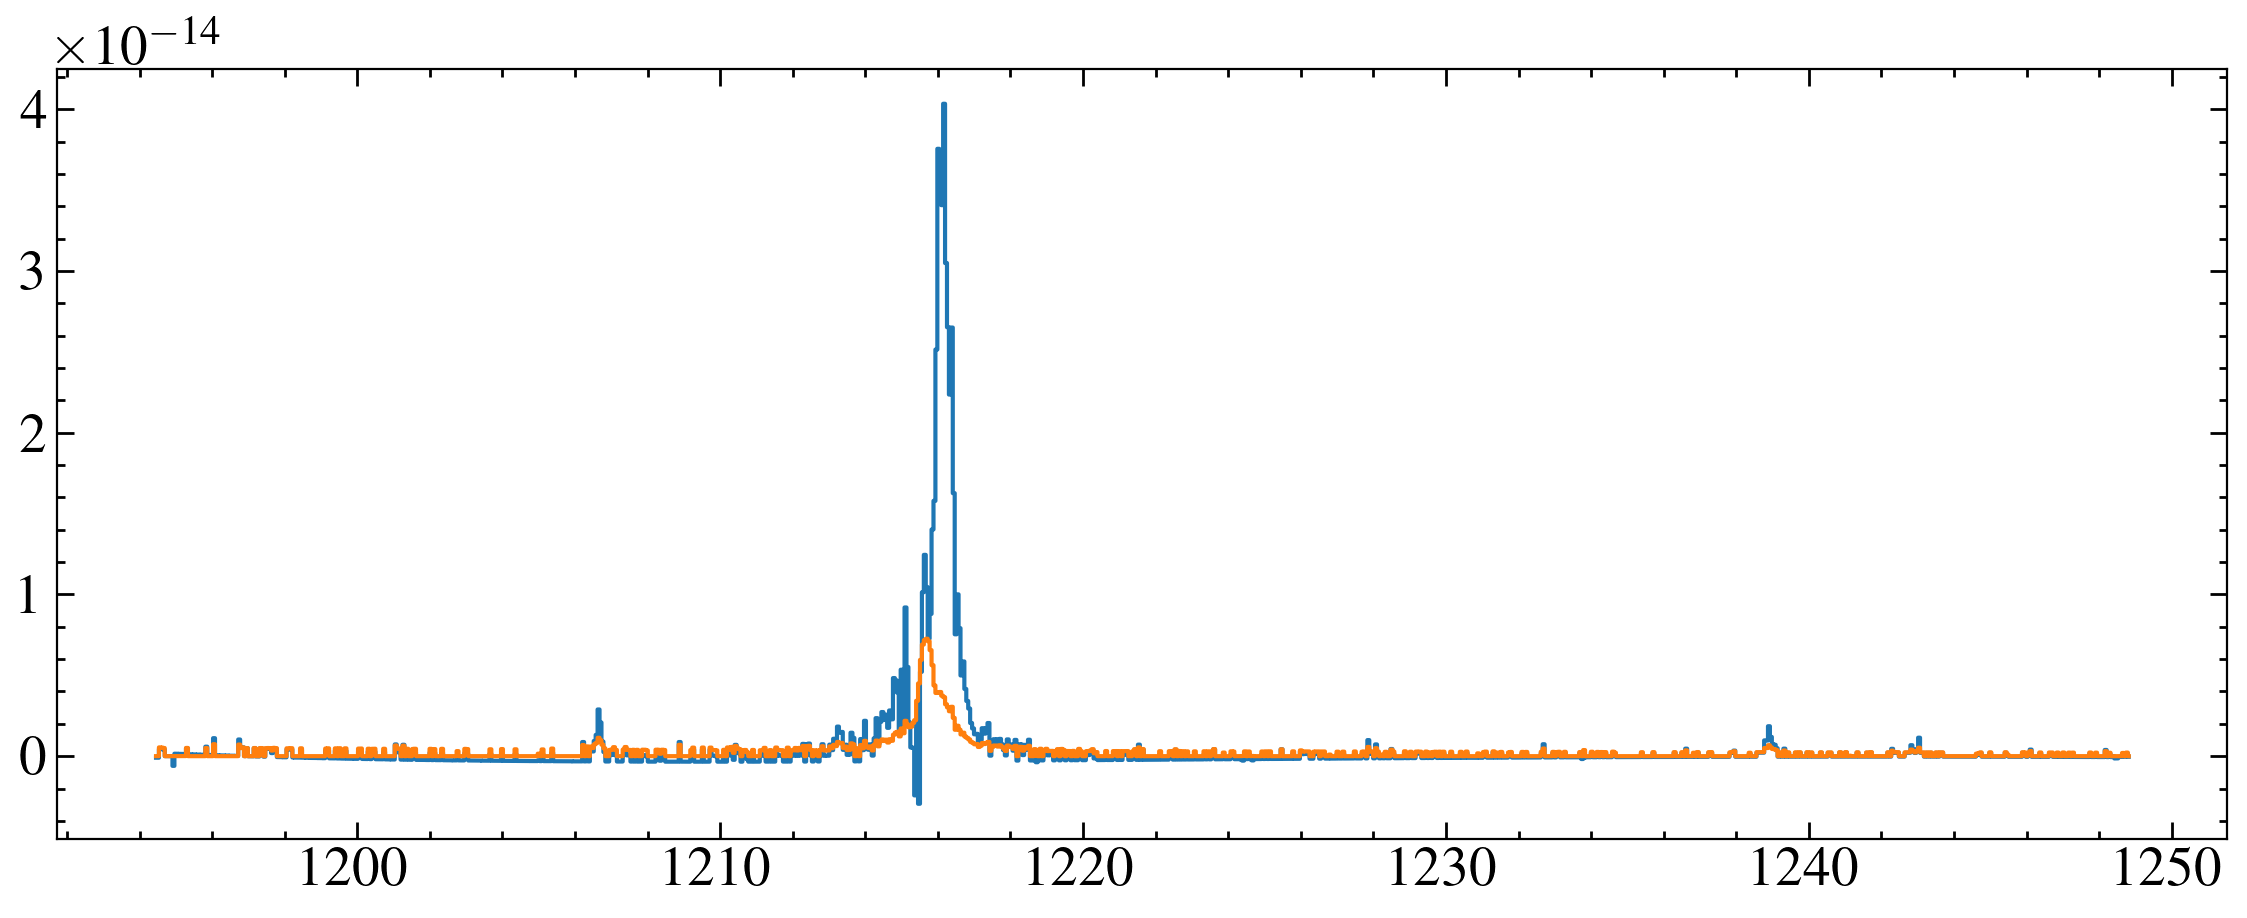

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13030_x1d.fits
G140M
500.03876


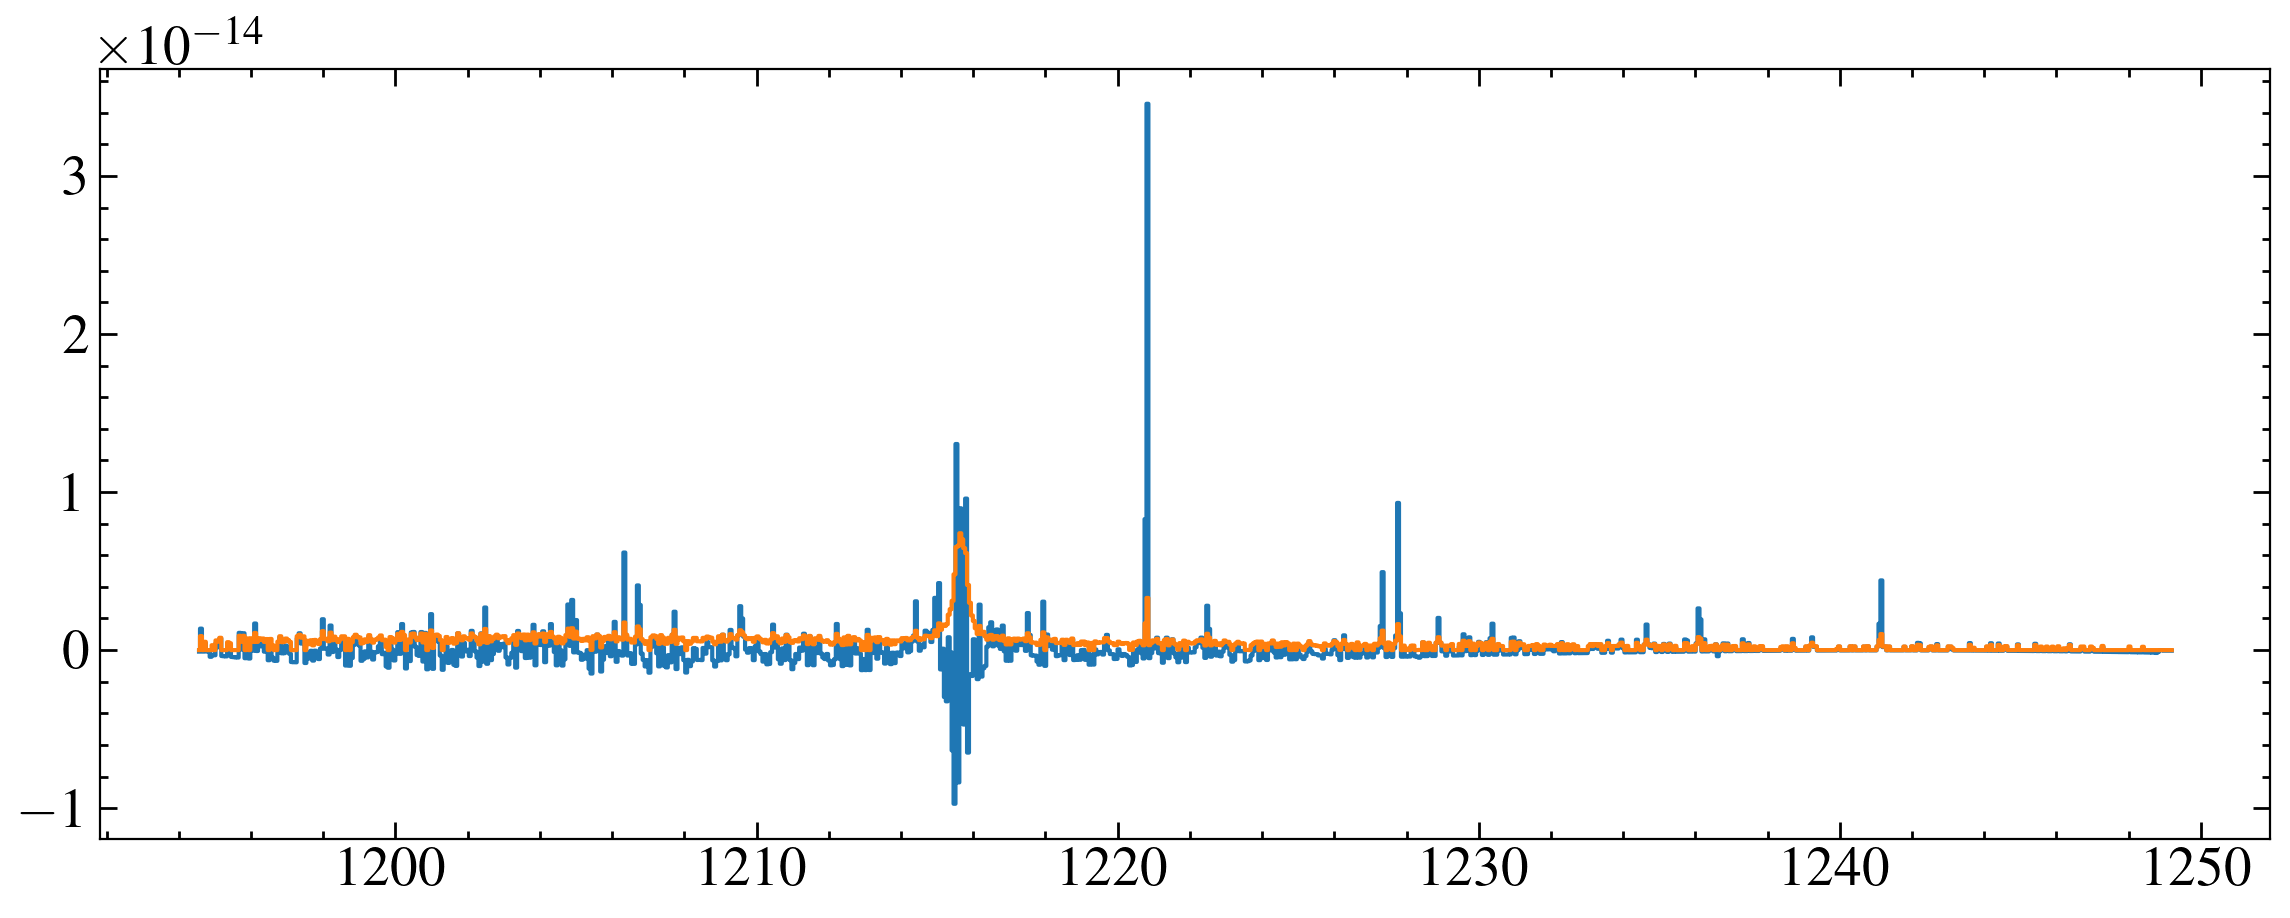

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13040_x1d.fits
G230L
537.8063


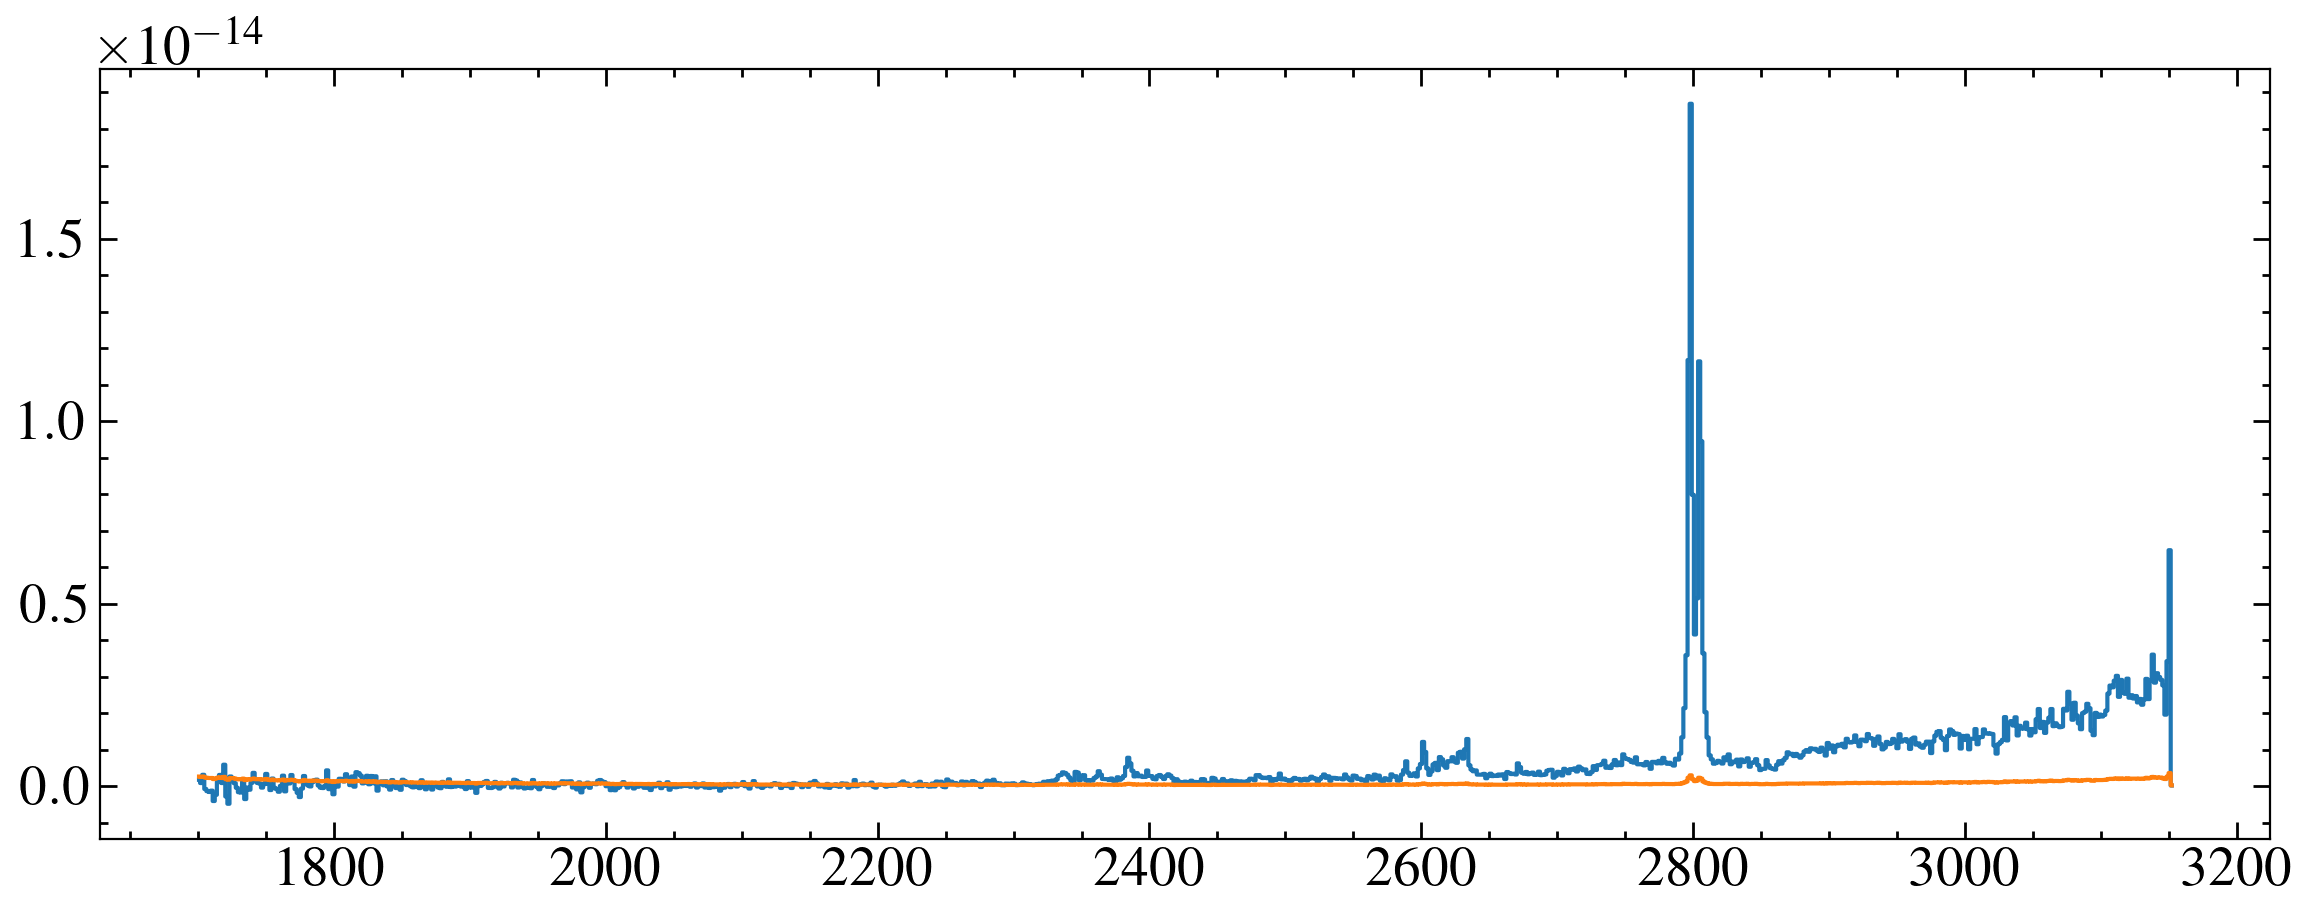

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13050_sx1.fits
G430L
895.03186


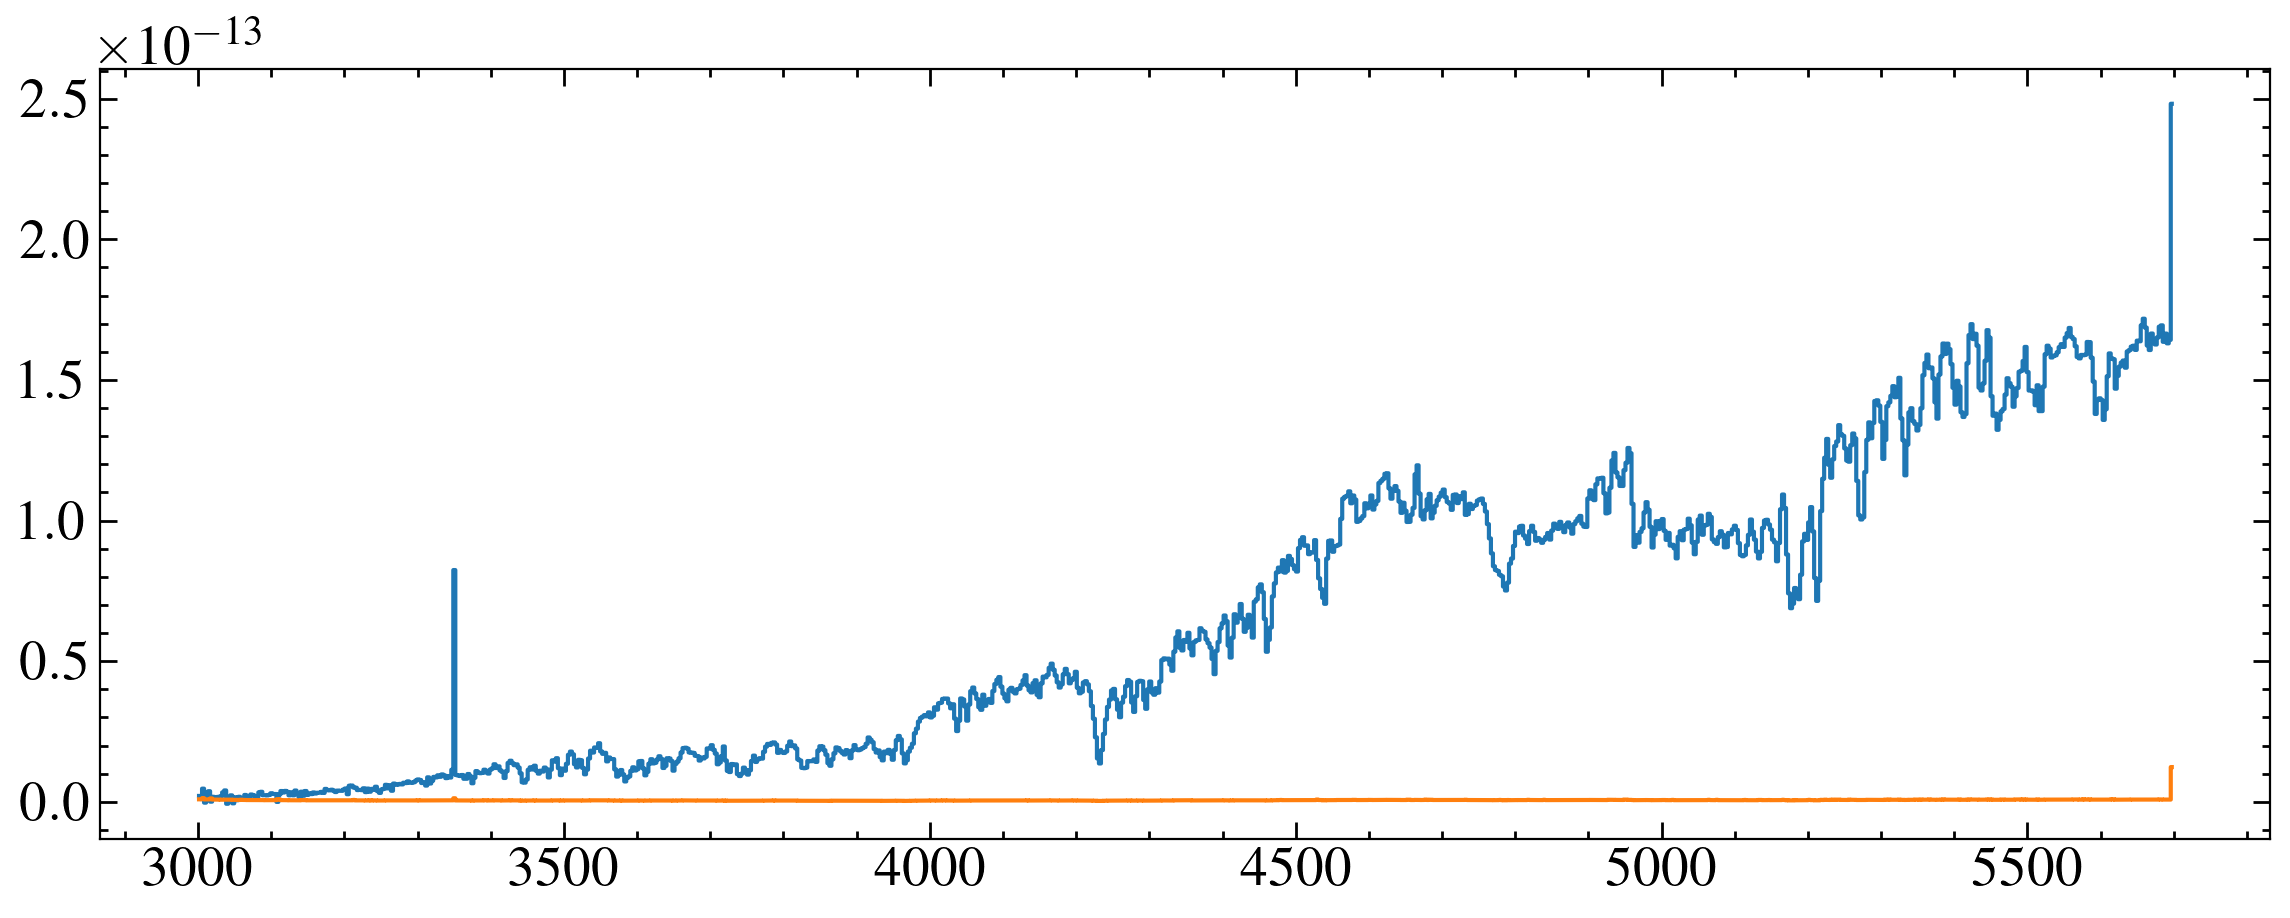

In [4]:
for x in x1ds[:-1]:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    if x != x1ds[-1]:
        print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160)
    if grating =='G230L':
        mask = (w > 1700)
    if grating =='G430L':
        mask = (w > 3000)
    
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

In [5]:
import stistools
os.environ['oref'] = path 

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [6]:
for root in  ['oeoo13030']:

    raw = '{}/{}_flt.fits'.format(path, root)
    rootname = fits.getheader(raw)['ROOTNAME'] 
    outname = 'reextractions/toi-134/{}_new_x1d.fits'.format(rootname)
    stistools.x1d.x1d(raw, output = outname, trailer='reextractions/{}_new.trl'.format(rootname), a2center=160, maxsrch=5)

160.35678


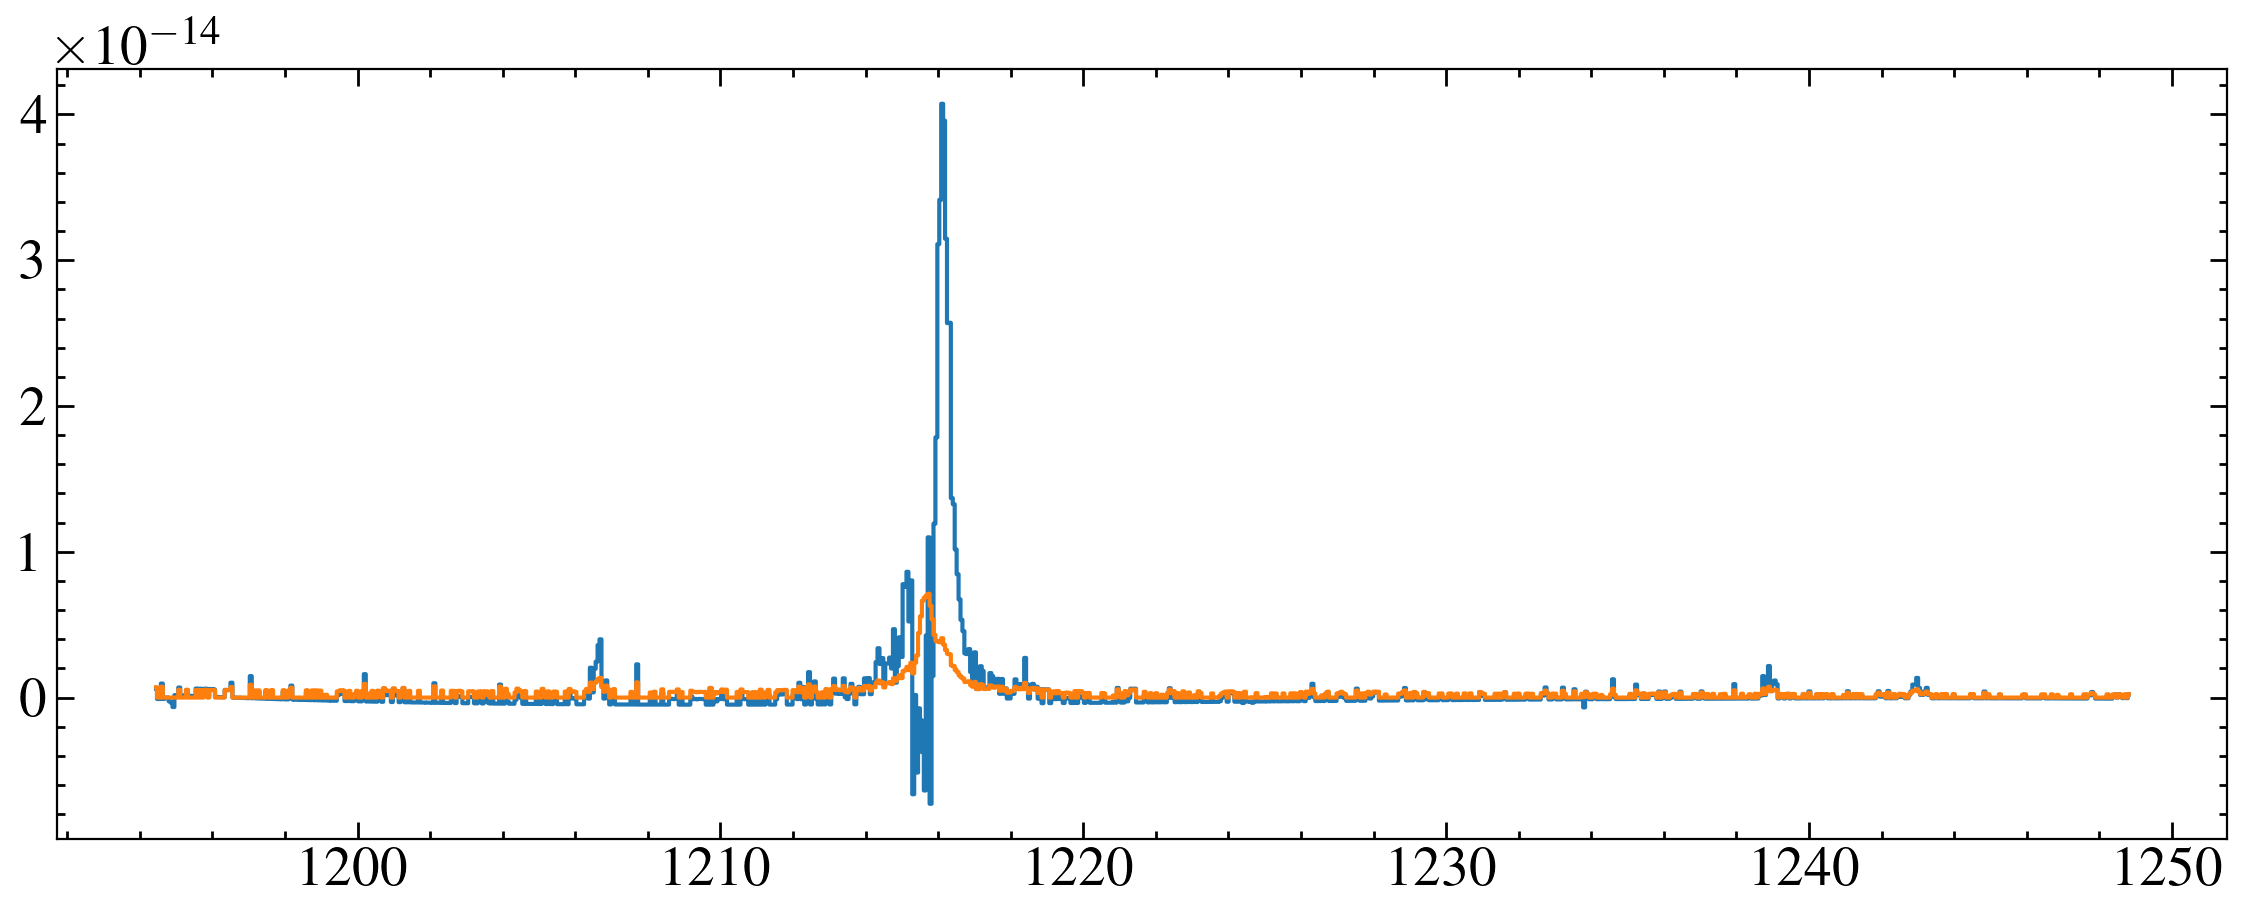

In [7]:
for root in  ['oeoo13030']:
        data = fits.getdata('reextractions/toi-134/{}_new_x1d.fits'.format(root), 1)[0]
        print(data['A2Center'])
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        # mask = w > 1700
        # w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid')
        plt.step(w, e, where='mid')
        plt.show()


/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13010_x1d.fits
G140M
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13020_x1d.fits
G140M
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13030_x1d.fits
G140M
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13040_x1d.fits
G230L
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13050_sx1.fits
G430L
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits
G130M


(1e-17, 5.628406109271941e-13)

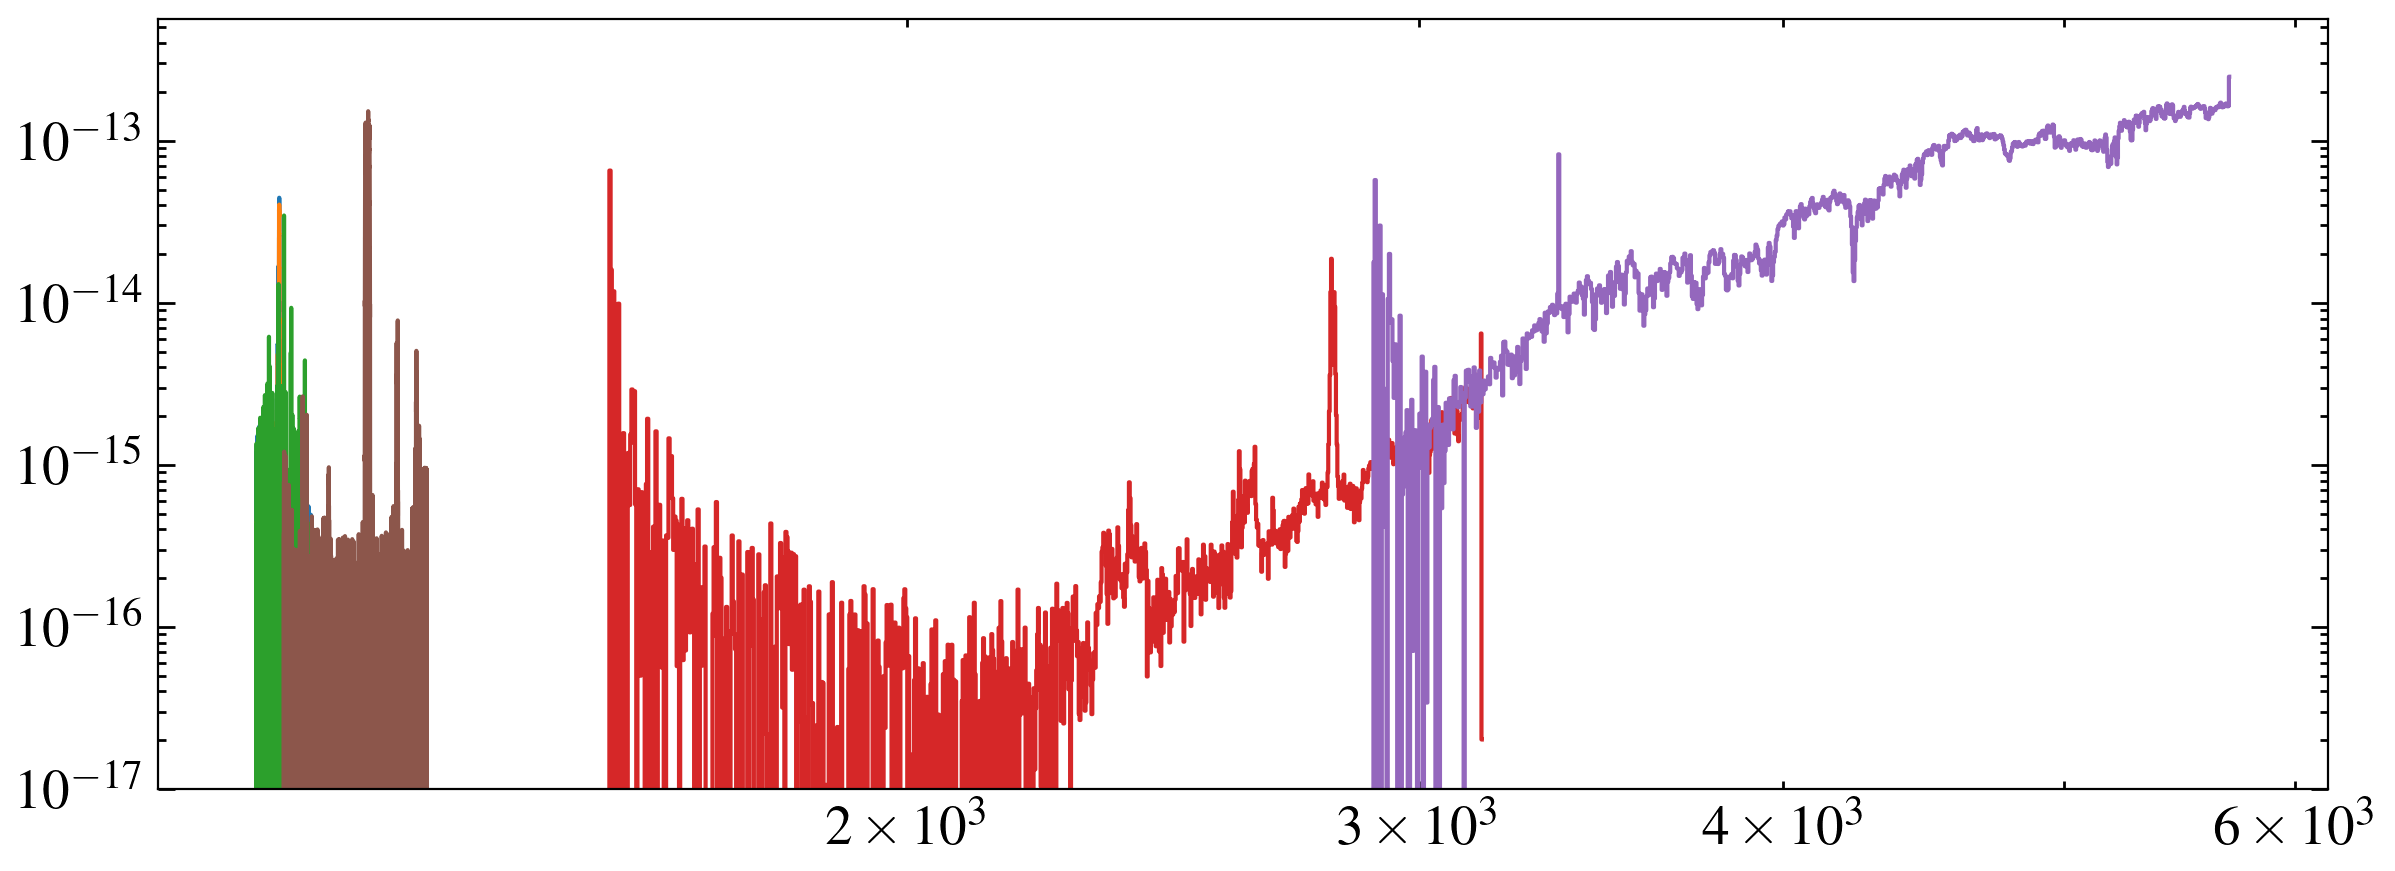

In [8]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    
    
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-17)
    # plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits
G130M


(-1e-15, 1e-14)

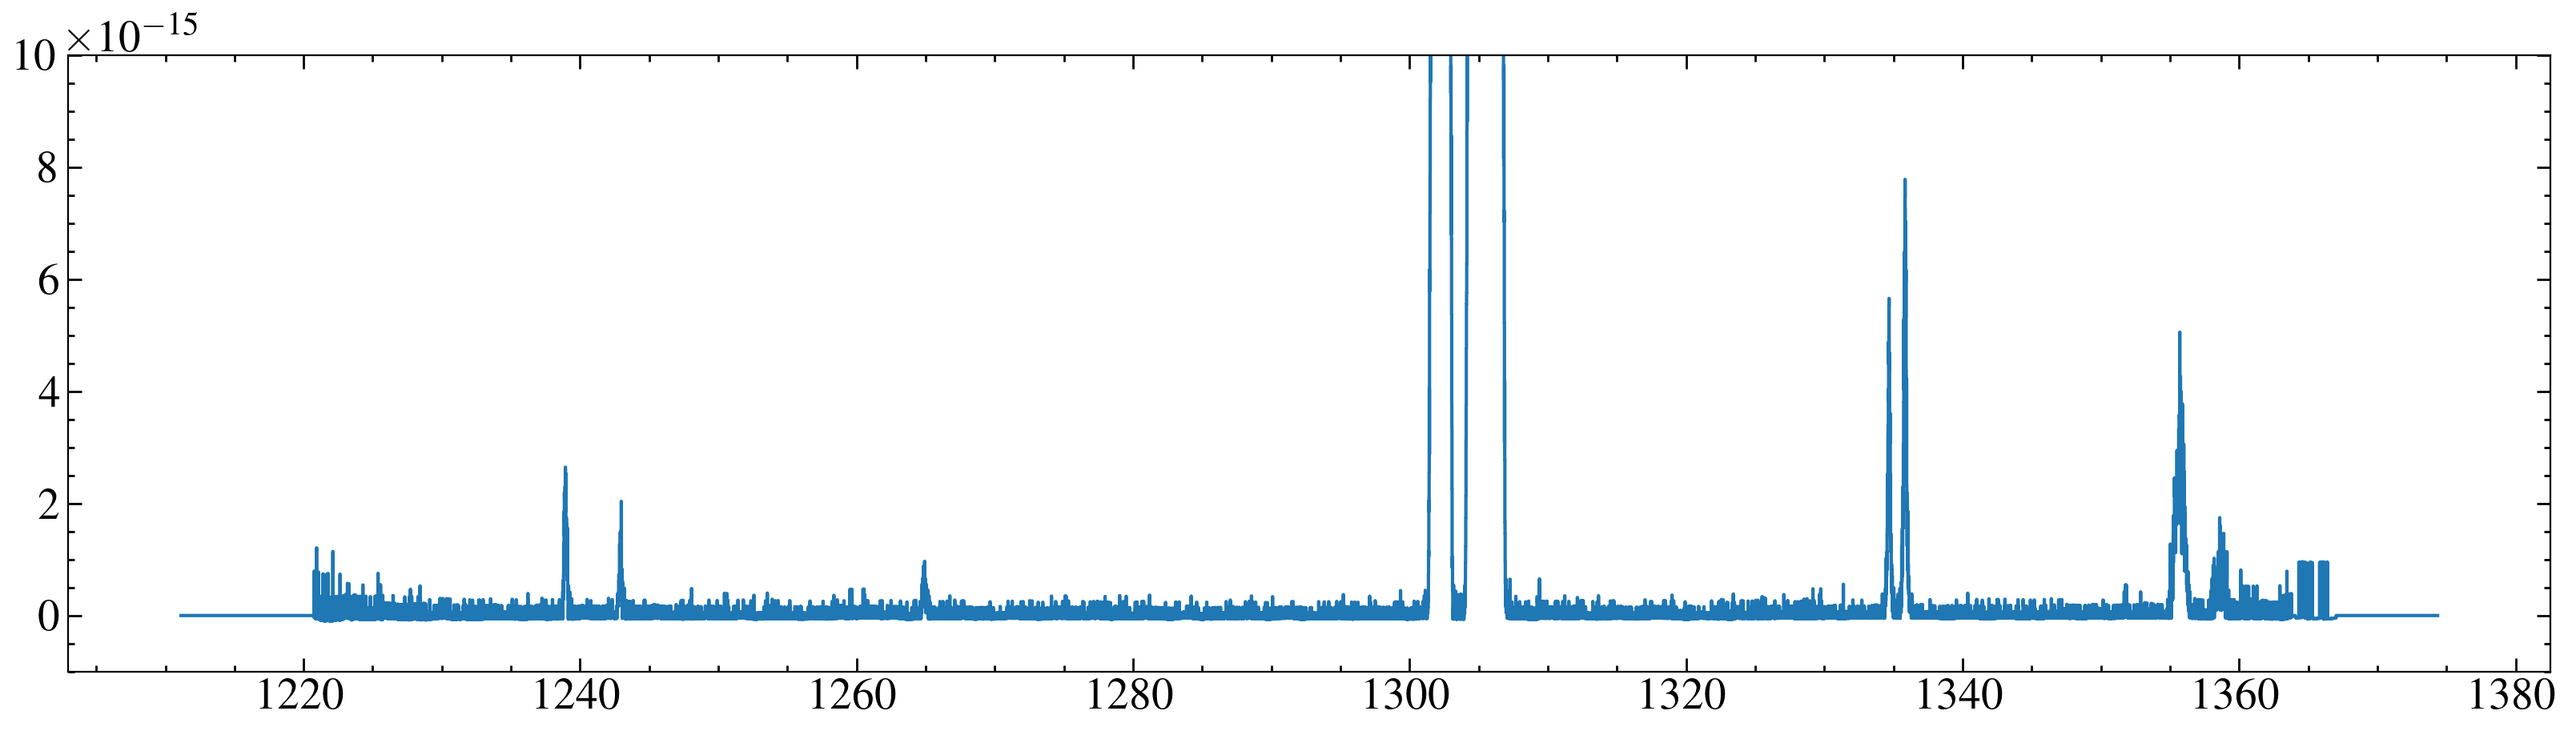

In [9]:
plt.figure(figsize=(20, 5))
for x in x1ds[-1:]:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    
    
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
# plt.xscale('log')
# plt.yscale('log')
plt.ylim(-1e-15, 1e-14)
    # plt.show()
    

['/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits']
['/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits']


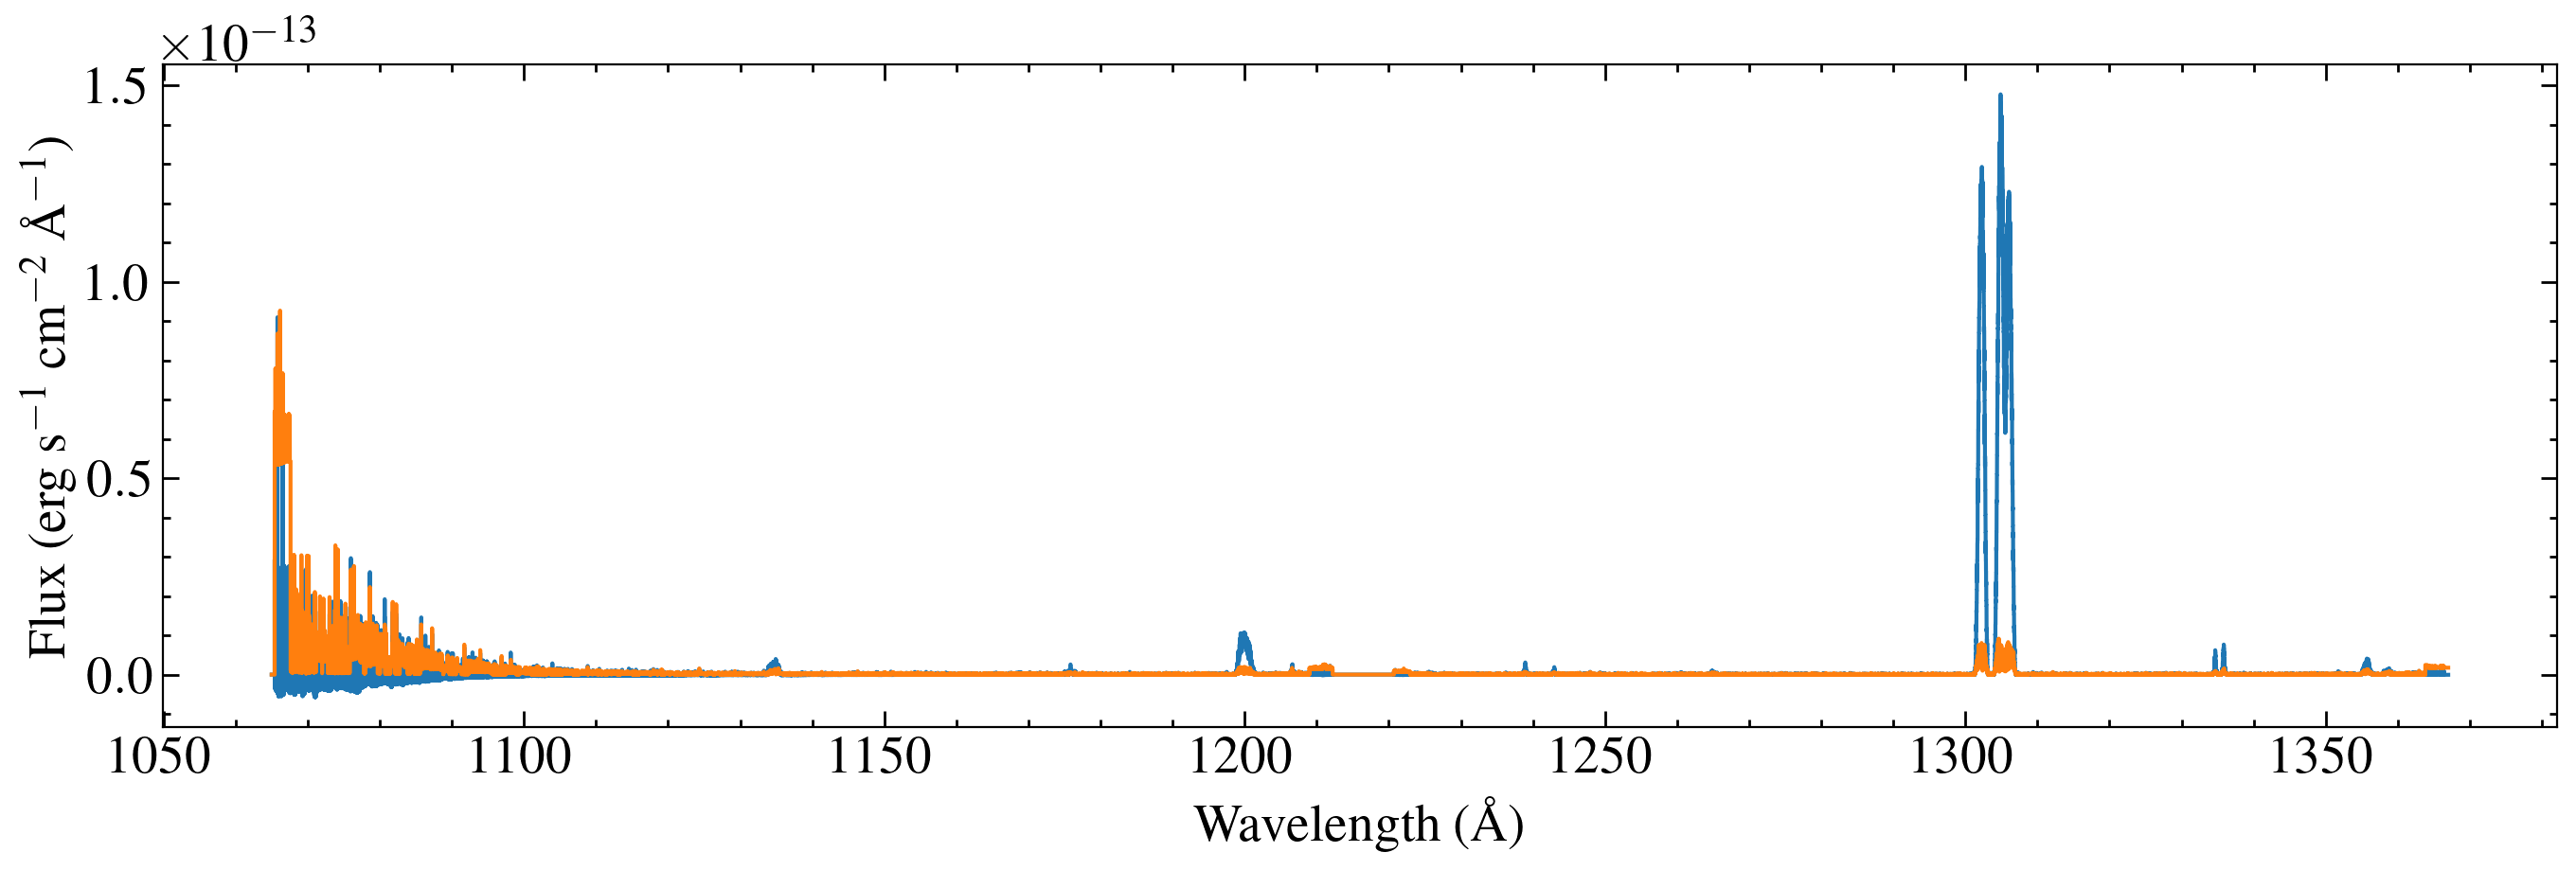

Spectrum saved as hlsp_muscles_hst_cos_toi-134_g130m_v1_component-spec.fits


In [10]:
import prepare_cos
# importlib.reload(prepare_cos)

savpath = 'cos_files/toi-134/TOI134_COS130M_Mm1_proc06mar2024.sav.txt'
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/'
hlsp = 'meats_hlsp_info.csv'
version = 1
savepath = 'draft_hlsp/toi-134/'
# star = 
prepare_cos.make_cos_spectrum(savpath, version, x1dpath, hlsp, savepath = savepath, plot=True, save_fits=True, star='TOI-134')

(0.0, 2e-14)

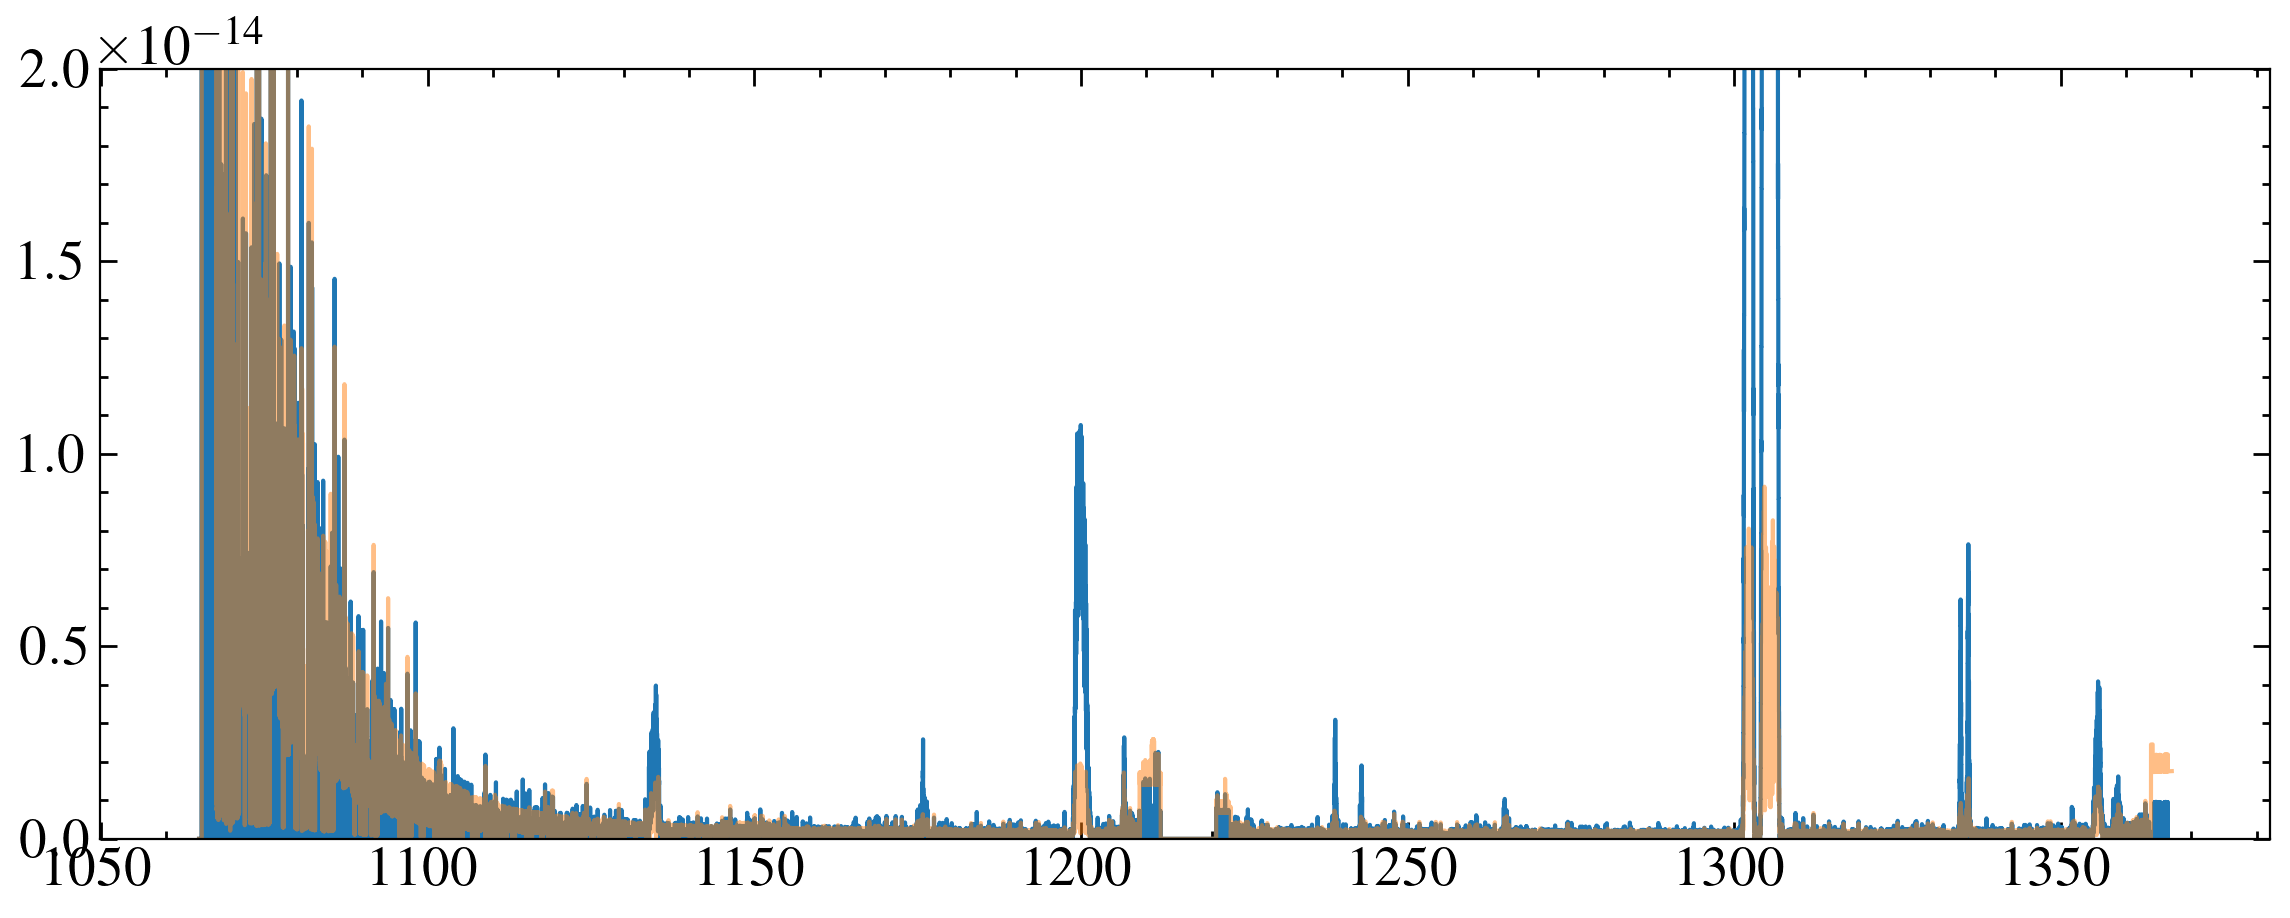

In [11]:
data = fits.getdata('draft_hlsp/toi-134/hlsp_muscles_hst_cos_toi-134_g130m_v1_component-spec.fits', 1)

w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
plt.step(w, f, where='mid')
plt.step(w, e, where='mid', alpha=0.5)
plt.ylim(0, 2e-14)

will need a G140L proxy. GJ 649 has similar spectral type and prot. Thank you me from the past.

/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/astropy/stats/funcs.py:745: RuntimeWarning: invalid value encountered in sqrt
  [n + 0.5 - np.sqrt(n + 0.25), n + 0.5 + np.sqrt(n + 0.25)]


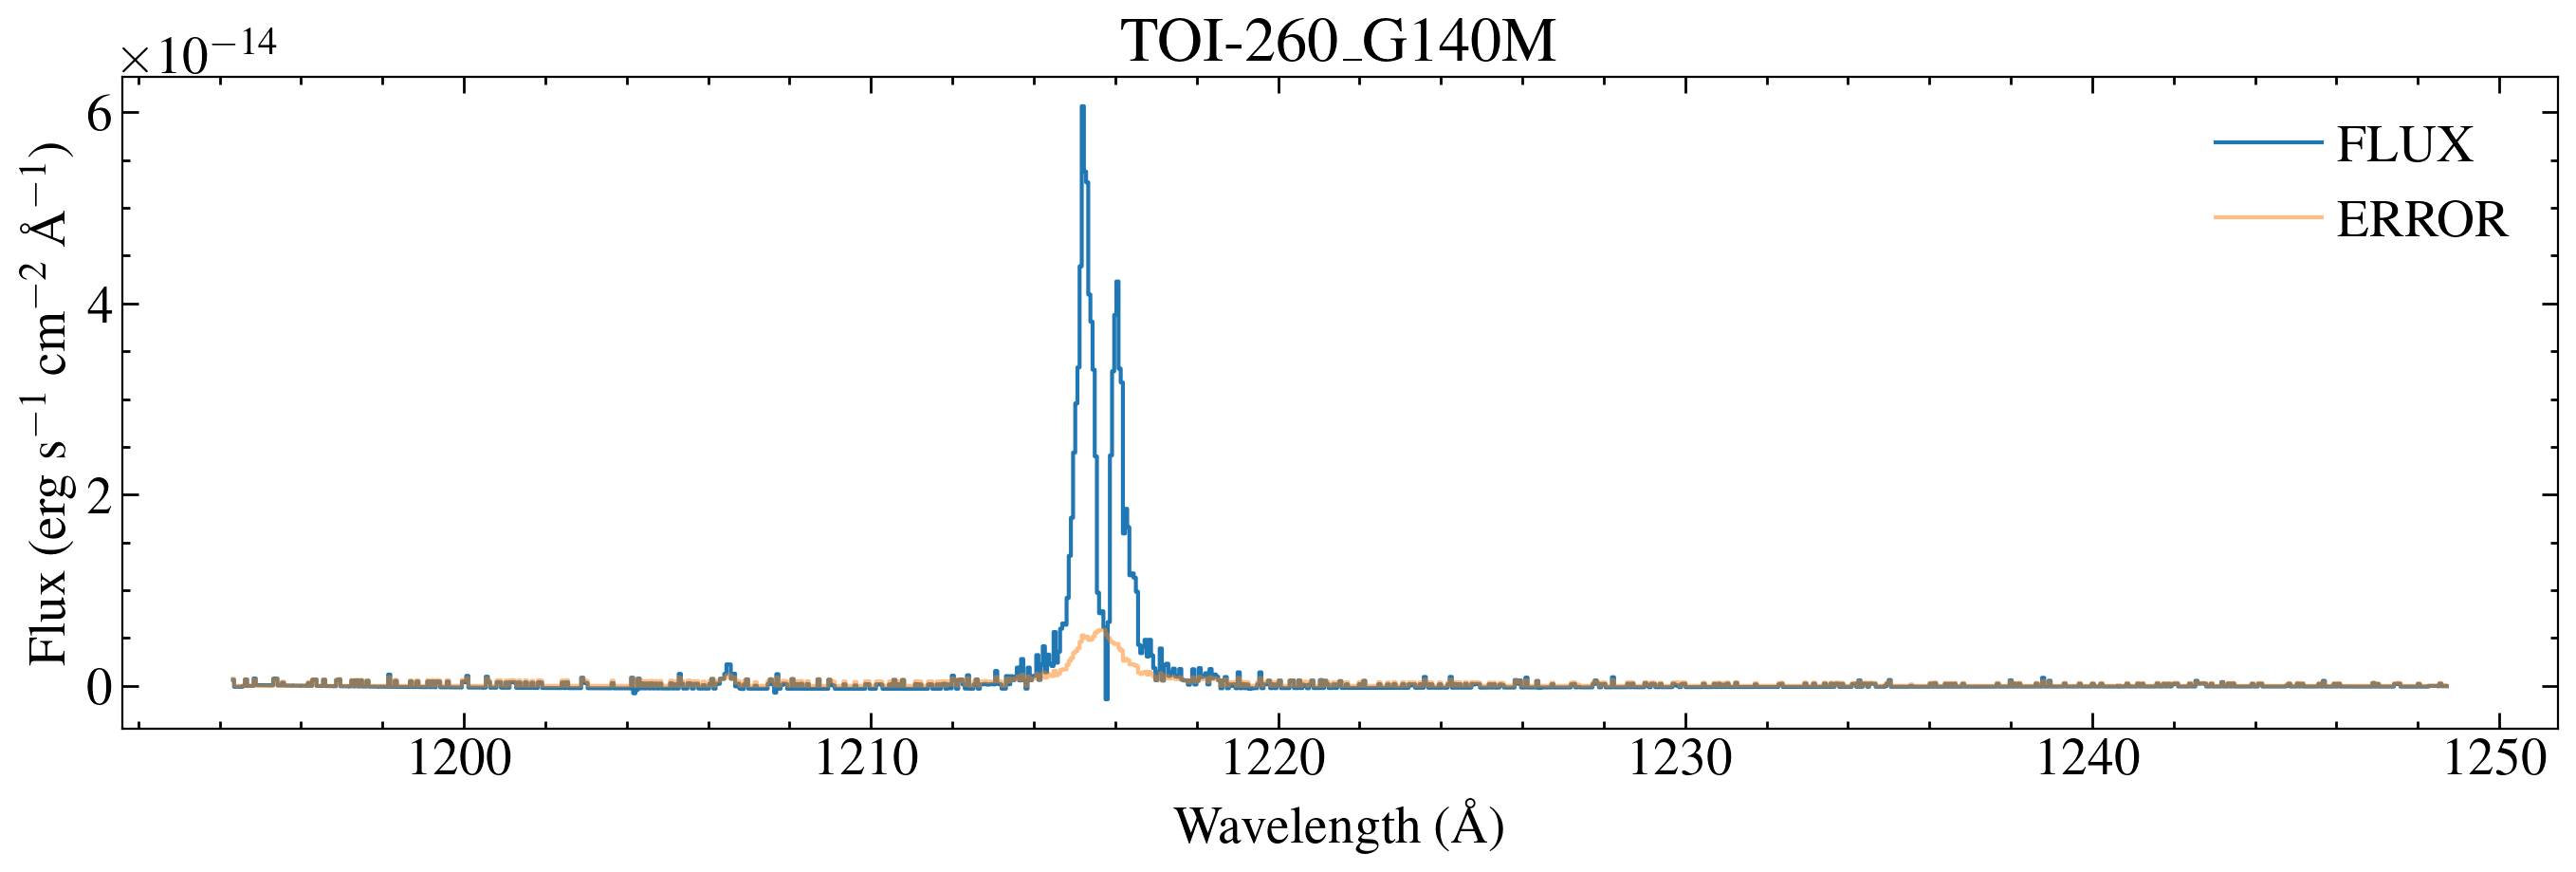

Spectrum saved as hlsp_muscles_hst_stis_toi-260_g140m_v1_component-spec.fits


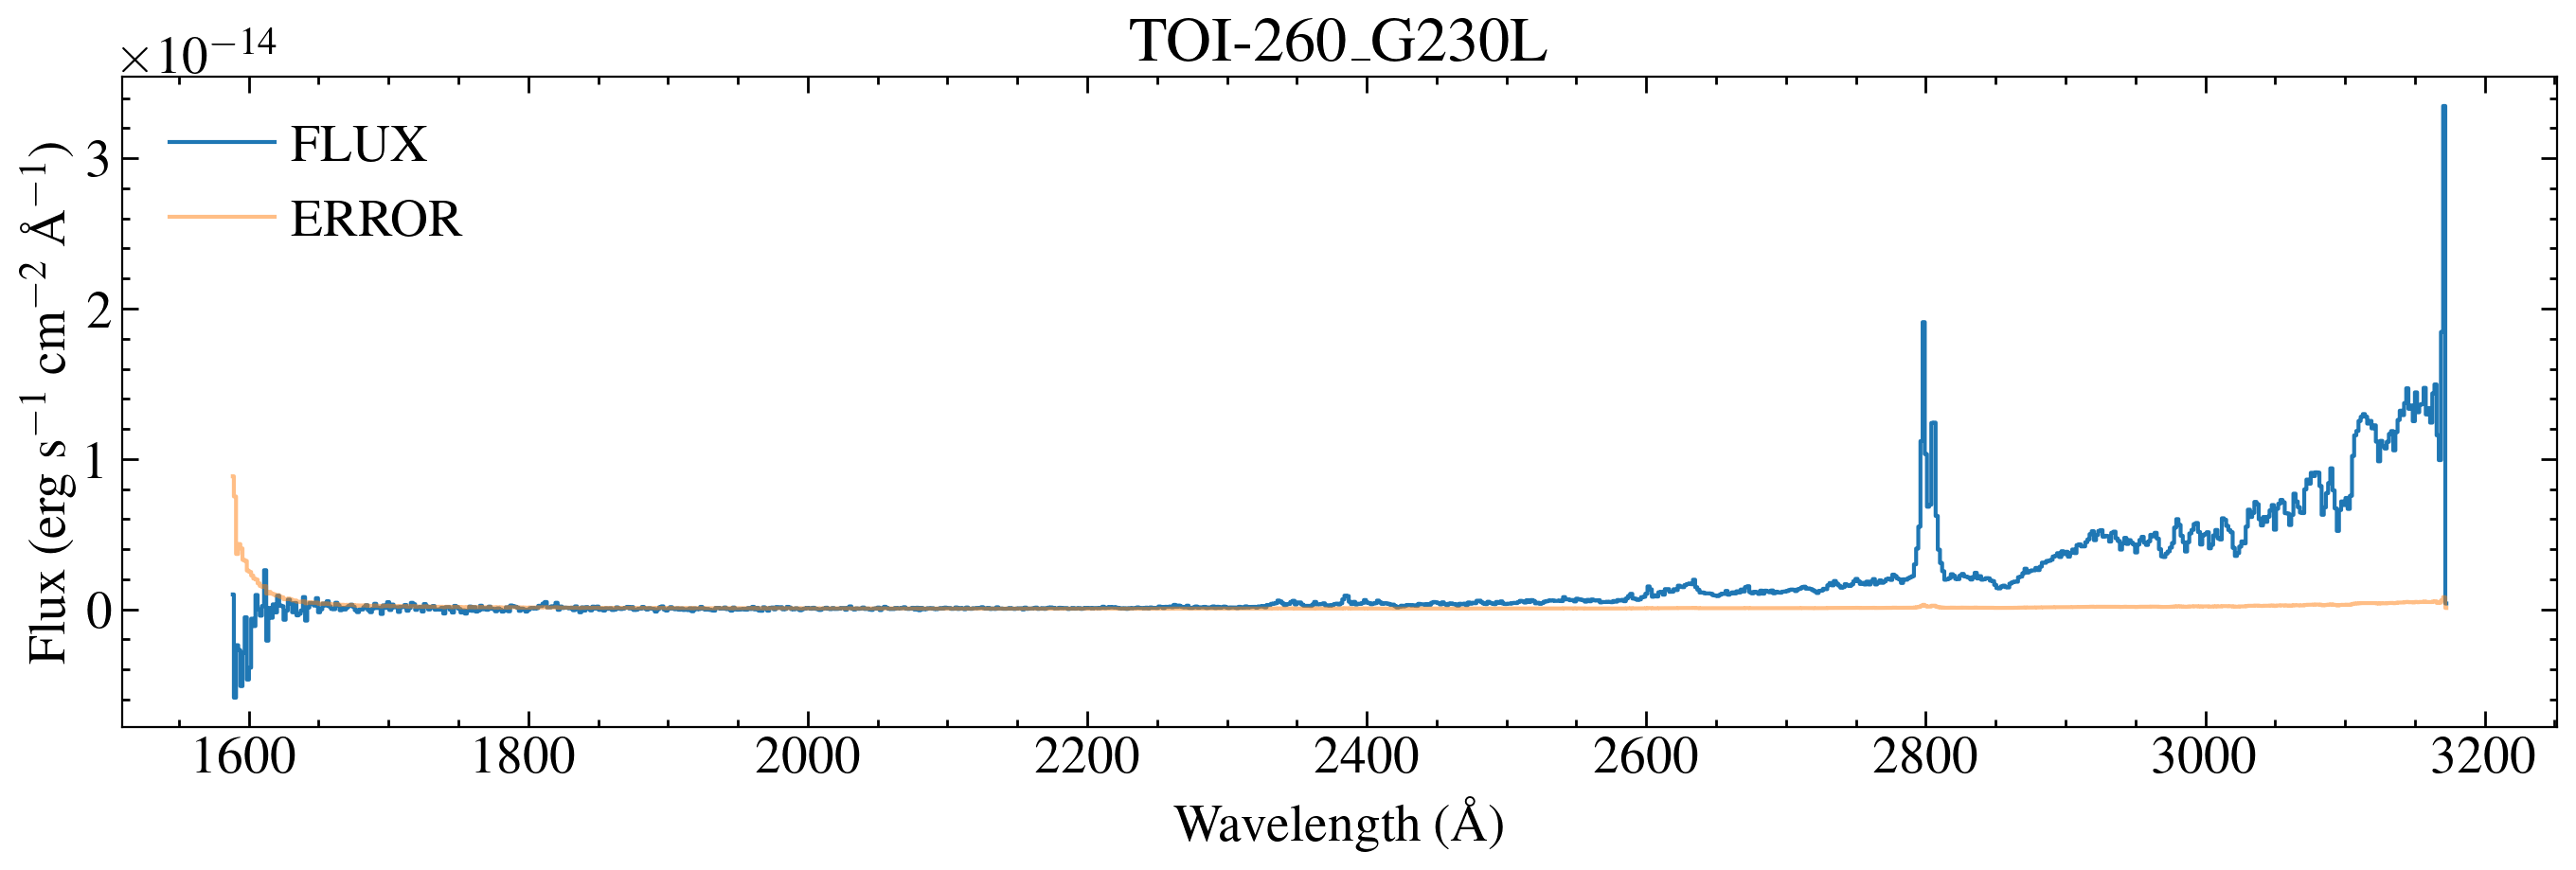

Spectrum saved as hlsp_muscles_hst_stis_toi-260_g230l_v1_component-spec.fits


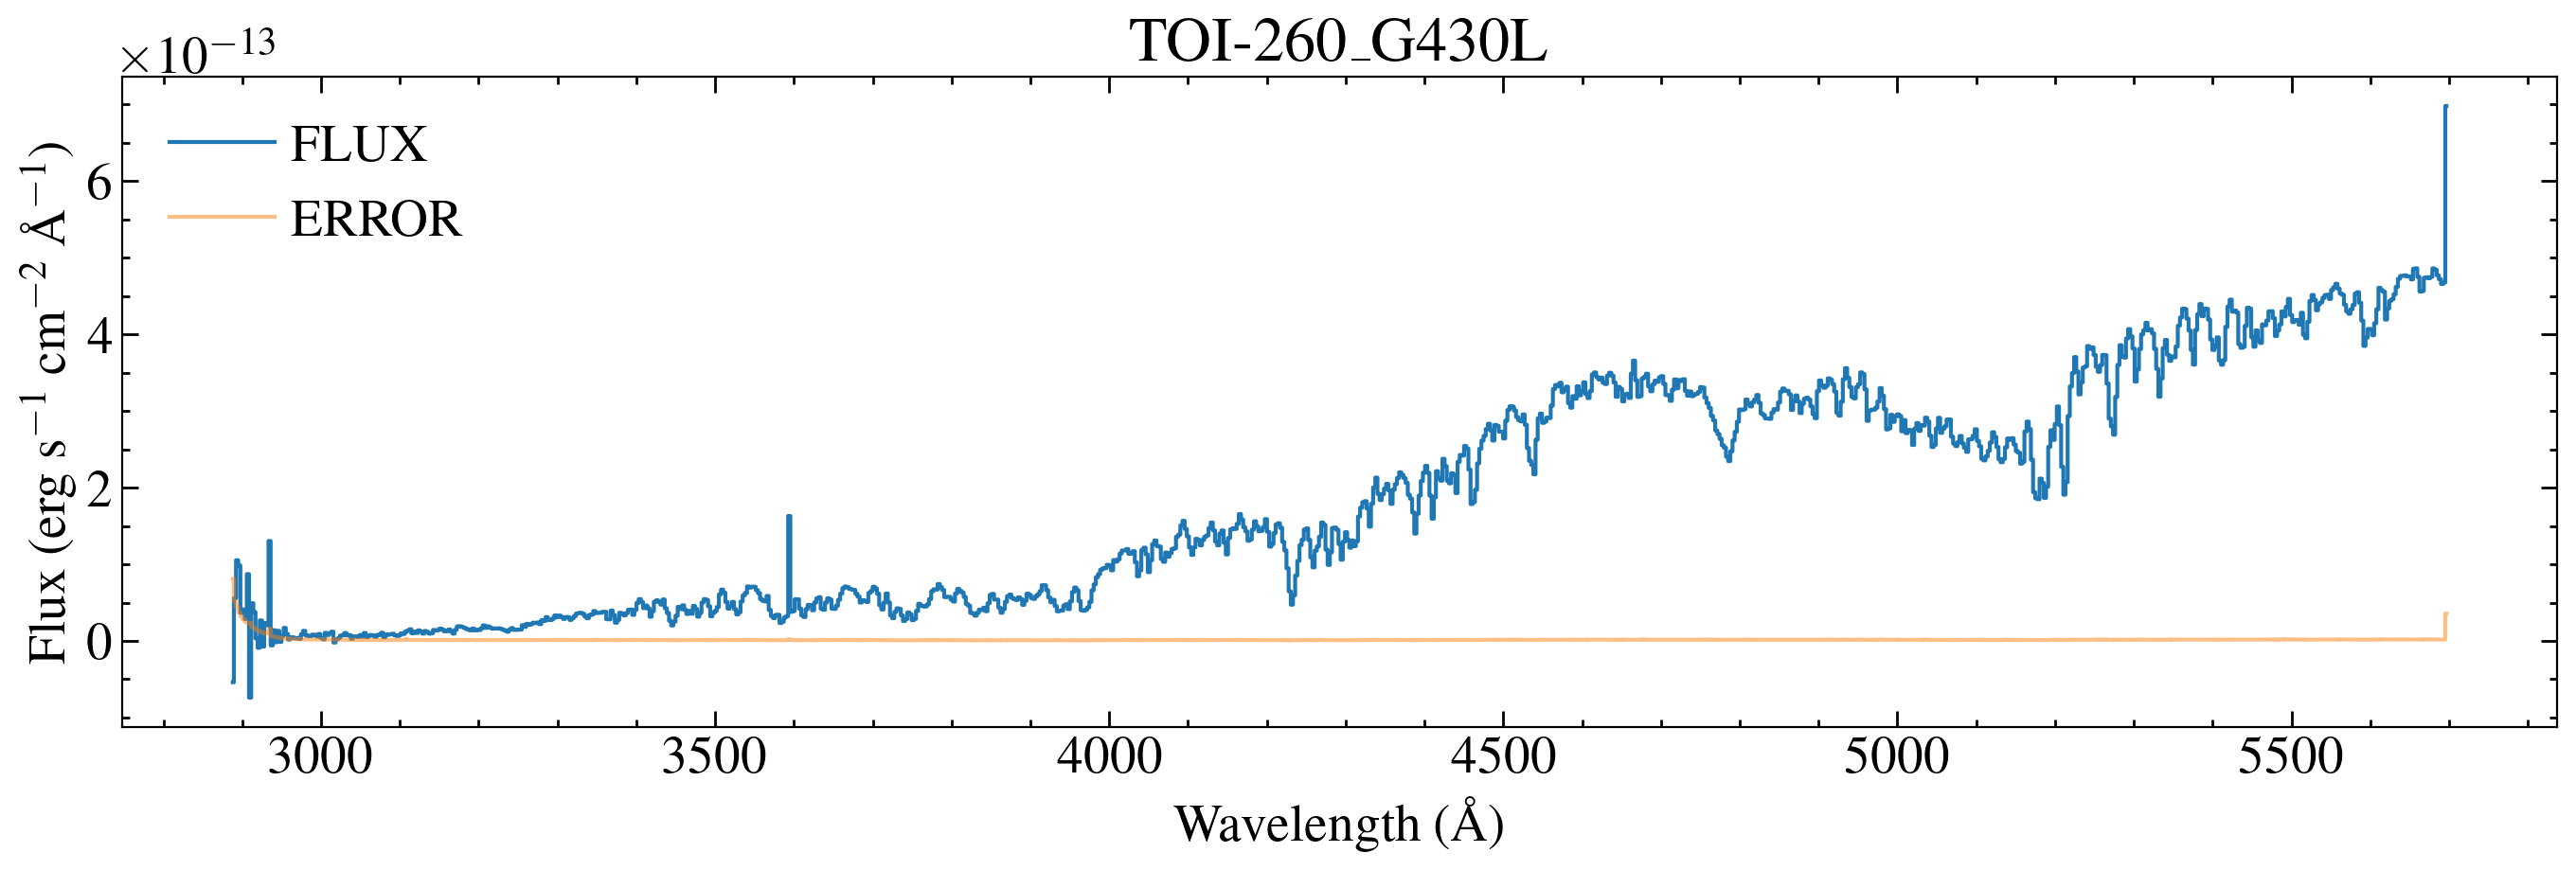

Spectrum saved as hlsp_muscles_hst_stis_toi-260_g430l_v1_component-spec.fits


In [45]:
import prepare_stis
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/use_spectra/'
savepath = 'draft_hlsp/toi-134/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'TOI-134')


In [13]:
import prepare_phoenix_svo as pp
# importlib.reload(pp)

G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
mass = 0.62
teff = 3800
teff_e = 70

radius = 0.6
distance = 25.18

save_path = 'models/'
star = 'toi-134'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
g = 4.04
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'Teff_e':teff_e,  'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc}
# pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True, make_error=True)
pdata = Table.read('models/{}_phoenix_interpolated.ecsv'.format(star))
pw, pf, pe = pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR']
normfac = ((radius*R)/((distance*u.pc).to(u.m)))**2

In [14]:
hlsp_x1ds = glob.glob('draft_hlsp/toi-134/*stis*.fits')
hlsp_x1ds

['draft_hlsp/toi-134/hlsp_muscles_hst_stis_toi-134_g140m_v1_component-spec.fits',
 'draft_hlsp/toi-134/hlsp_muscles_hst_stis_toi-134_g430l_v1_component-spec.fits',
 'draft_hlsp/toi-134/hlsp_muscles_hst_stis_toi-134_g230l_v1_component-spec.fits']

No lyman alpha reconstructions, have to check in with Allison about which we have.

In [15]:
# T_1 =   2.2 MK +- 0.3 MK
# T_2 = 10.4  (-6.0, +5.3) MK
# EM_1 = 8.3 (-1.8, +1.9) x 1e49 cm-3
# EM_2 = 9.7 (-5.7, +7.3) x 1e48 cm-3

print((2.2e6*u.K).to(u.keV, equivalencies=u.temperature_energy()))
print((0.3e6*u.K).to(u.keV, equivalencies=u.temperature_energy()))
print((10.4e6*u.K).to(u.keV, equivalencies=u.temperature_energy()))
print((6e6*u.K).to(u.keV, equivalencies=u.temperature_energy()))
print((5.3e6*u.K).to(u.keV, equivalencies=u.temperature_energy()))

0.1895813317671939 keV
0.025851999786435535 keV
0.8962026592630986 keV
0.5170399957287106 keV
0.45671866289369445 keV


In [16]:
xpath = '/media/david/2tb_ext_hd/hddata/meats/xmm/toi-134/TOI-134.fits'
hdul = fits.open(xpath)
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TARGET  = 'TOI-134 '                                                            
HIERARCH Instrument = 'EPIC    '                                                

In [17]:
hdr = hdul[0].header

In [18]:
hdr.append(('mos1_FILTER', 'Medium'))
hdr.append(('mos2_FILTER', 'Medium'))
hdr.append(('pn_FILTER', 'Medium'))
hdr.append(('pn_DURATION', 27950))
hdr.append(('pn_DATE-OBS', '2022-04-09 21:21:27'))
hdr.append(('pn_DATE-END','2022-04-10 05:07:17' ))
hdr.append(('OBS_ID', '0892000401'))
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TARGET  = 'TOI-134 '                                                            
HIERARCH Instrument = 'EPIC    '                                                
HIERARCH mos1_FILTER = 'Medium  '                                               
HIERARCH mos2_FILTER = 'Medium  '                                               
HIERARCH pn_FILTER = 'Medium  '                                                 
HIERARCH pn_DURATION = 27950                                                    
HIERARCH pn_DATE-OBS = '2022-04-09 21:21:27'                                    
HIERARCH pn_DATE-END = '2022-04-10 05:07:17'                                    
OBS_ID  = '0892000401'      

In [19]:
hdul.writeto('/media/david/2tb_ext_hd/hddata/meats/xmm/toi-134/TOI-134_djw.fits', overwrite=True)

In [20]:
import prepare_xmm

xmm_path = '/media/david/2tb_ext_hd/hddata/meats/xmm/toi-134/TOI-134_djw.fits'

hlsp = dict(Table.read('meats_hlsp_info.csv'))
# hlsp = np.genfromtxt('meats_hlsp_info.csv', delimiter=',', dtype=None, names=True)
# xmm_path = xpath
version = 1

prepare_xmm.make_xmm_spectra(xmm_path, savepath, version, hlsp, apec_repo='models/', make_apec=True, save_ecsv=False, save_fits=True)

Spectrum saved as hlsp_muscles_xmm_epic_toi-134_na_v1_component-spec.fits


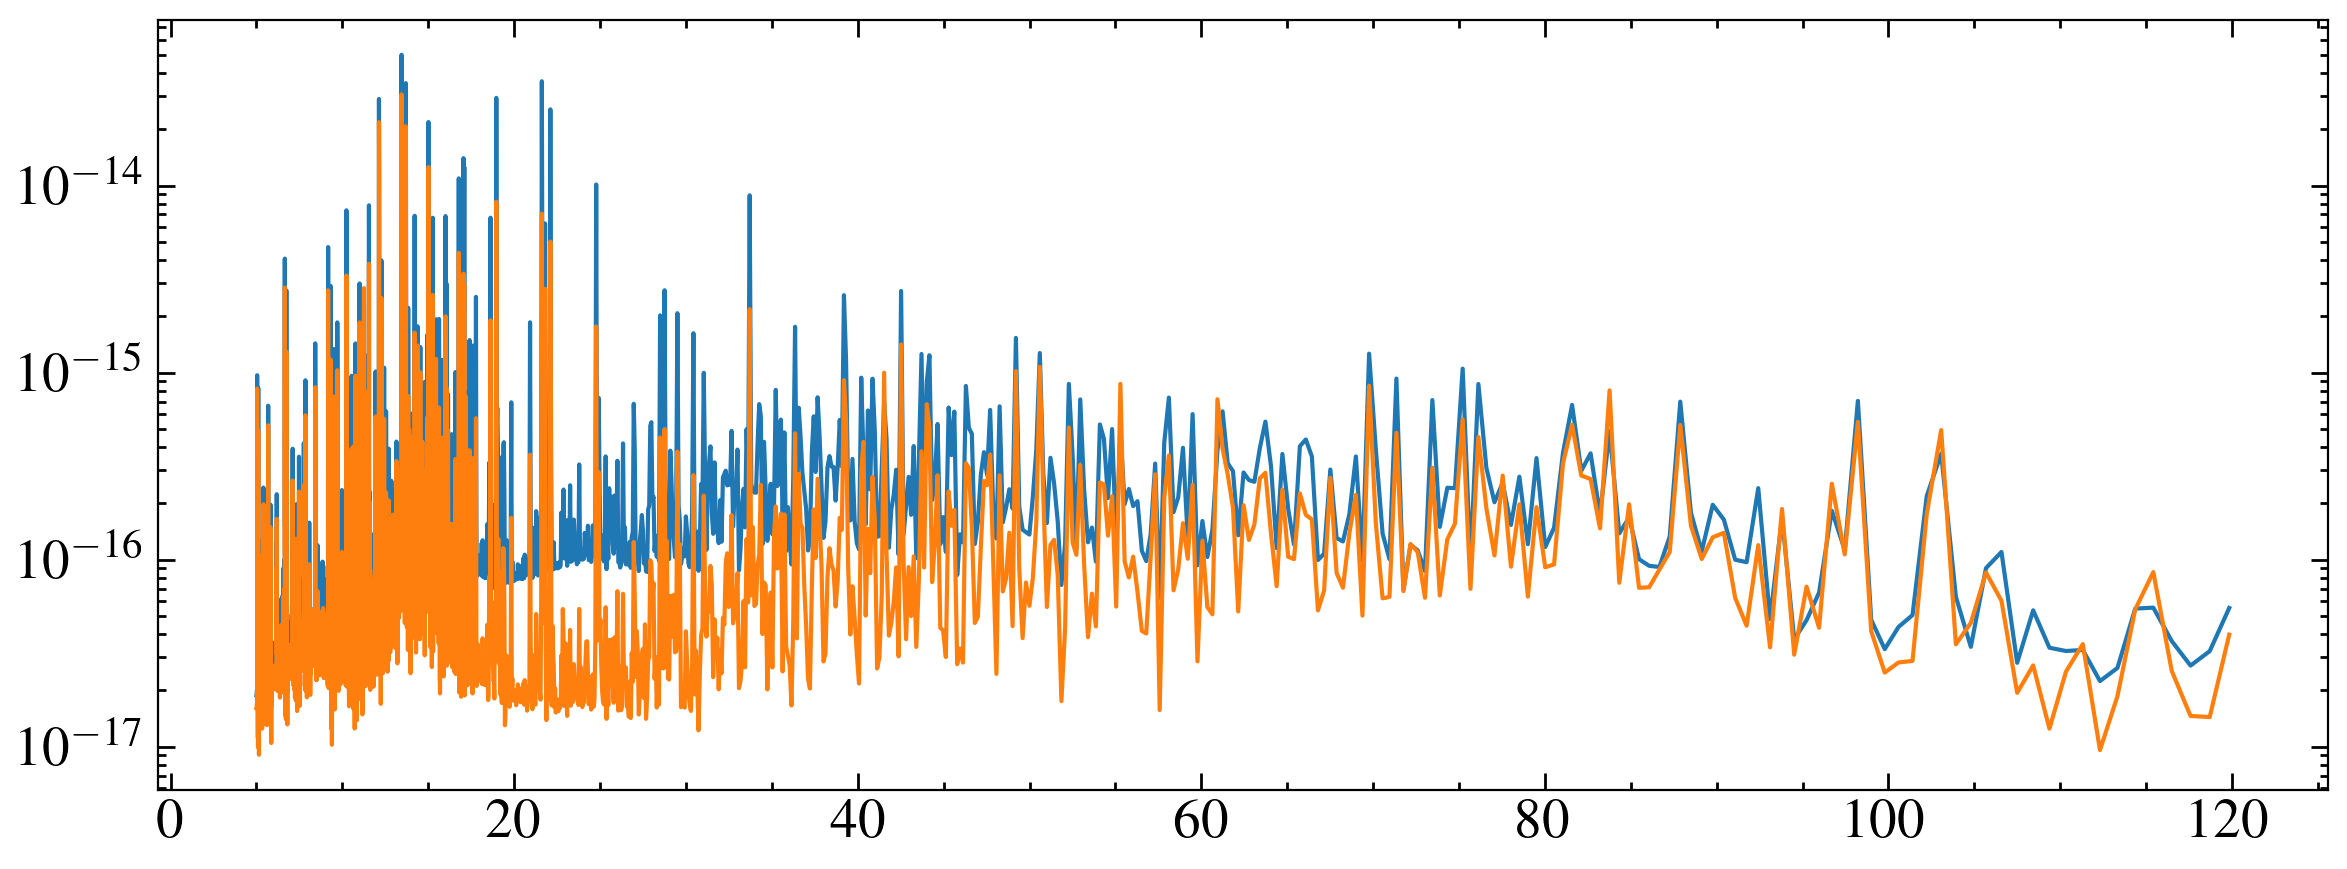

In [21]:
xray = Table.read('models/TOI-134_apec_errs.ecsv')
plt.plot(xray['WAVELENGTH'], xray['FLUX'])
plt.plot(xray['WAVELENGTH'], xray['ERROR'])
plt.yscale('log')

In [22]:
import prepare_model
hdr = fits.getheader('draft_hlsp/toi-134/hlsp_muscles_hst_stis_toi-134_g140m_v1_component-spec.fits', 0)
sed_data = Table(meta=hdr)
prepare_model.make_model_spectrum('models/TOI-134_apec_errs.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='apec')

Spectrum saved as hlsp_muscles_model_apec_toi-134_na_v1_component-spec.fits


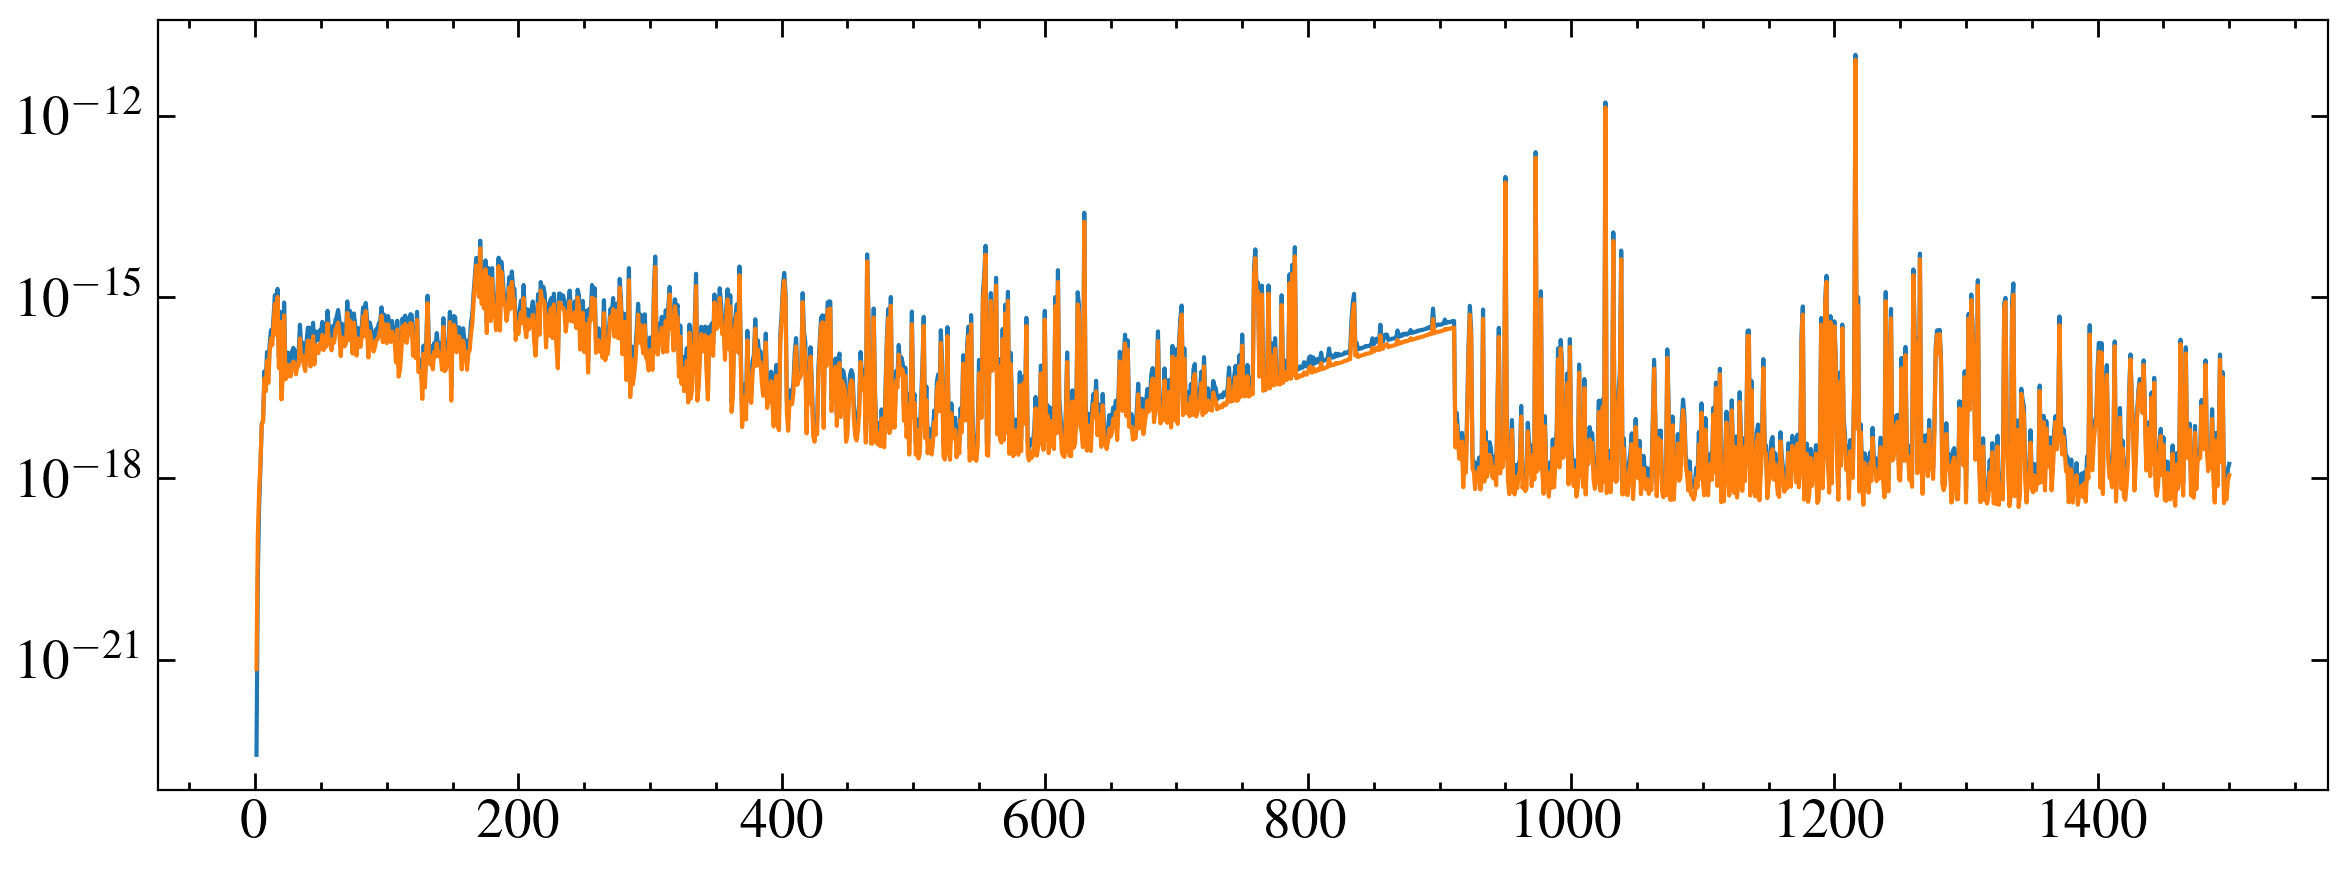

In [23]:
#dem 
dempath = '/media/david/2tb_ext_hd/hddata/meats/dems/toi-134/spectrum_TOI-134_p17.fits'
dem = fits.getdata(dempath, 1)

dw, df= dem['Wavelength'], dem['Flux_density']
eu, el = dem['Upper_Error_84'], dem['Lower_Error_16']


mean_e = np.mean([eu, el], axis=0)
# plt.plot(dw, mean_e)
# plt.yscale('log')

log_mean_e = (eu - el) / (np.log(eu)- np.log(el))

plt.plot(dw, df)
plt.plot(dw, log_mean_e)
# plt.plot(dw, mean_e)

plt.yscale('log')

demtab = Table([dw, df, log_mean_e], names=['WAVELENGTH', 'FLUX', 'ERROR'])
demtab.write('models/toi-134_dem.ecsv', overwrite=True)



In [24]:
prepare_model.make_model_spectrum('models/toi-134_dem.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1, model_name='dem')

Spectrum saved as hlsp_muscles_model_dem_toi-134_na_v1_component-spec.fits


In [25]:
mmpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v26_hlsp_fixed/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v25_var-res-sed.fits'
mmdata = fits.getdata(mmpath, 1)
mmw, mmf, mme= mmdata['WAVELENGTH'], mmdata['FLUX'], mmdata['ERROR']



25.18


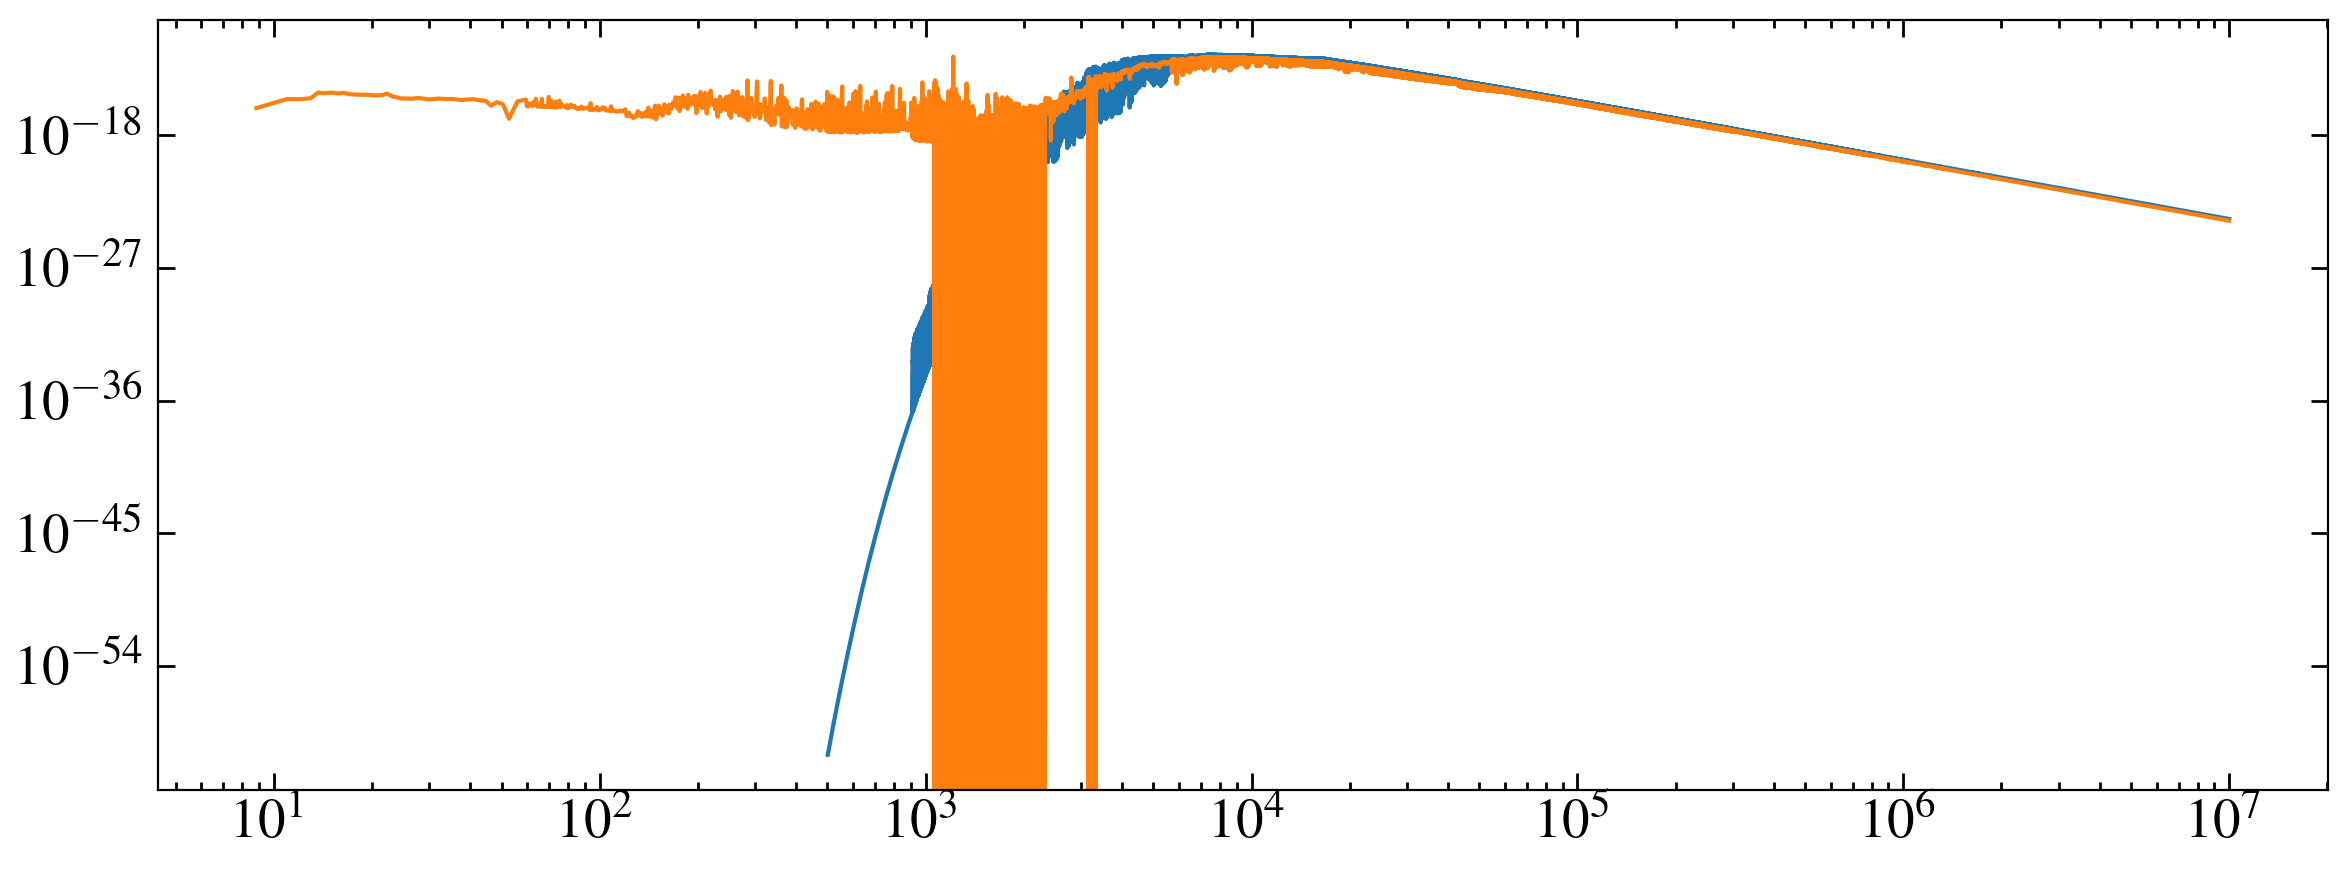

In [26]:
d_gj649 = 10.39
scale = (d_gj649/distance)**2
plt.plot(pw, pf*normfac)
plt.plot(mmw, mmf*scale)

plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-17)

print(distance)

In [27]:
proxpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v26_hlsp_fixed/GJ649/hlsp_muscles_hst_stis_gj649_g140l_v25_component-spec.fits'
proxdata = fits.getdata(proxpath, 1)
proxw, proxf, proxe= proxdata['WAVELENGTH'], proxdata['FLUX'], proxdata['ERROR']


cosspec = fits.getdata('draft_hlsp/toi-134/hlsp_muscles_hst_cos_toi-134_g130m_v1_component-spec.fits', 1)
cw, cf, ce = cosspec['WAVELENGTH'], cosspec['FLUX'], cosspec['ERROR']

1119.1012421562448 1715.224808537977


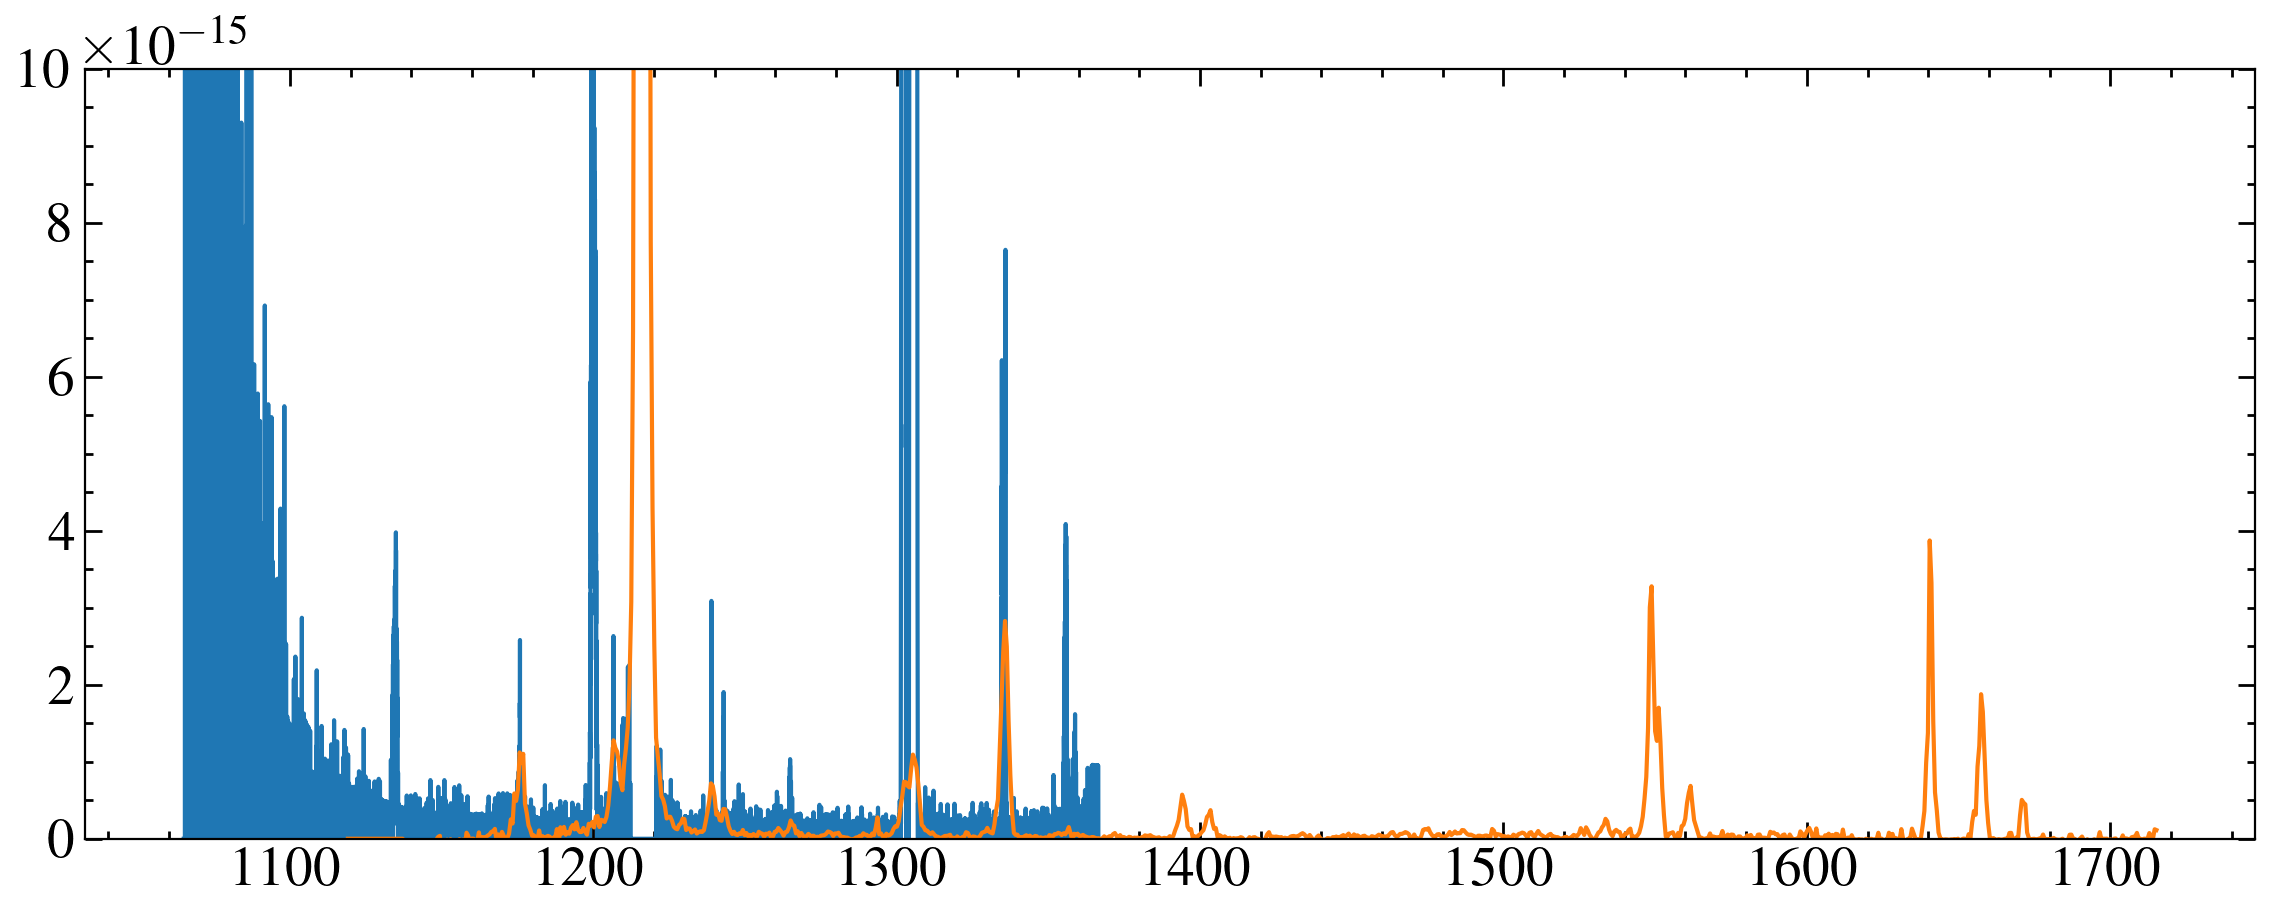

In [28]:
fig, ax = plt.subplots()

ax.plot(cw, cf)
ax.plot(proxw, proxf)

# ax.set_xlim(1310, 1400)
ax.set_ylim(0, 1e-14)
print(proxw[0],proxw[-1])

Yes looks fine. Just need Lya now

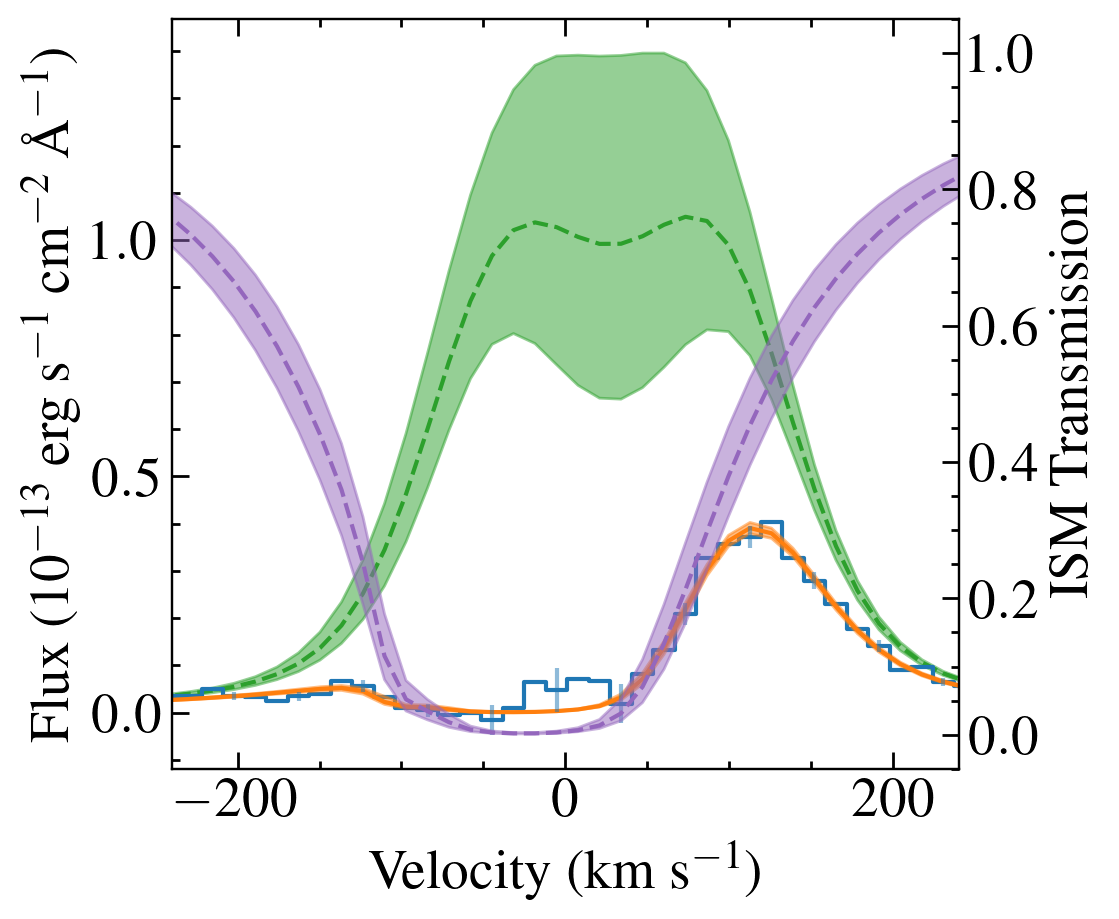

In [29]:
lyapath = '/media/david/2tb_ext_hd/hddata/meats/lya/toi-134/TOI134_LyA_MCMC_results.csv'
data = Table.read(lyapath)
# data.dtype.names


lya = 1215.67
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale

fig, ax= plt.subplots(figsize=(6,5))
v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
ax.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
ax.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
ax.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
ax.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)

ax.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
ax.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)

# name = os.path.split(spec)[1][:-34]
# ax.set_title(name, size=20)

# xlim = min([abs(min(v.value)), max(v.value)])-10
xlim = 240
ax.set_xlim(-xlim, xlim)
ax2=ax.twinx()
ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
ax2.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
ax2.set_ylim(-0.05, 1.05)
ax2.set_ylabel('ISM Transmission')


ax.set_xlabel('Velocity (km s$^{-1}$)', size=20)
ax.set_ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)

fig.tight_layout()

# fig.savefig('plots/toi-776_lya.pdf')

In [30]:

lw, lf, le = data['wave_lya'], data['lya_intrinsic_median'], np.mean([data['lya_intrinsic_high_1sig']-data['lya_intrinsic_median'], data['lya_intrinsic_median']-data['lya_intrinsic_low_1sig']], axis=0)
lyatab = Table([lw, lf, le], names=['WAVELENGTH', 'FLUX', 'ERROR'])
lyatab.write('models/toi-134_lya.ecsv', overwrite=True)

prepare_model.make_model_spectrum('models/toi-134_lya.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1, model_name='lya')


Spectrum saved as hlsp_muscles_model_lya_toi-134_na_v1_component-spec.fits


In [31]:
#PHX
prepare_model.make_model_spectrum('models/toi-134_phoenix_interpolated.ecsv', 1, sed_data,
                                  savepath = savepath, save_ecsv=False, save_fits=True, normfac=normfac.value, model_name='PHX')

Spectrum saved as hlsp_muscles_model_phx_toi-134_na_v1_component-spec.fits


In [41]:
starspec = fits.getdata('fixed_hlsp/toi-134/hlsp_muscles_multi_multi_toi-134_broadband_v25_adapt-const-res-sed.fits', 1)
starw, starf = starspec['WAVELENGTH'], starspec['FLUX']
sol = Table.read('Solar_1au_sed.ecsv')
sw, sf = sol['WAVELENGTH'], sol['FLUX']

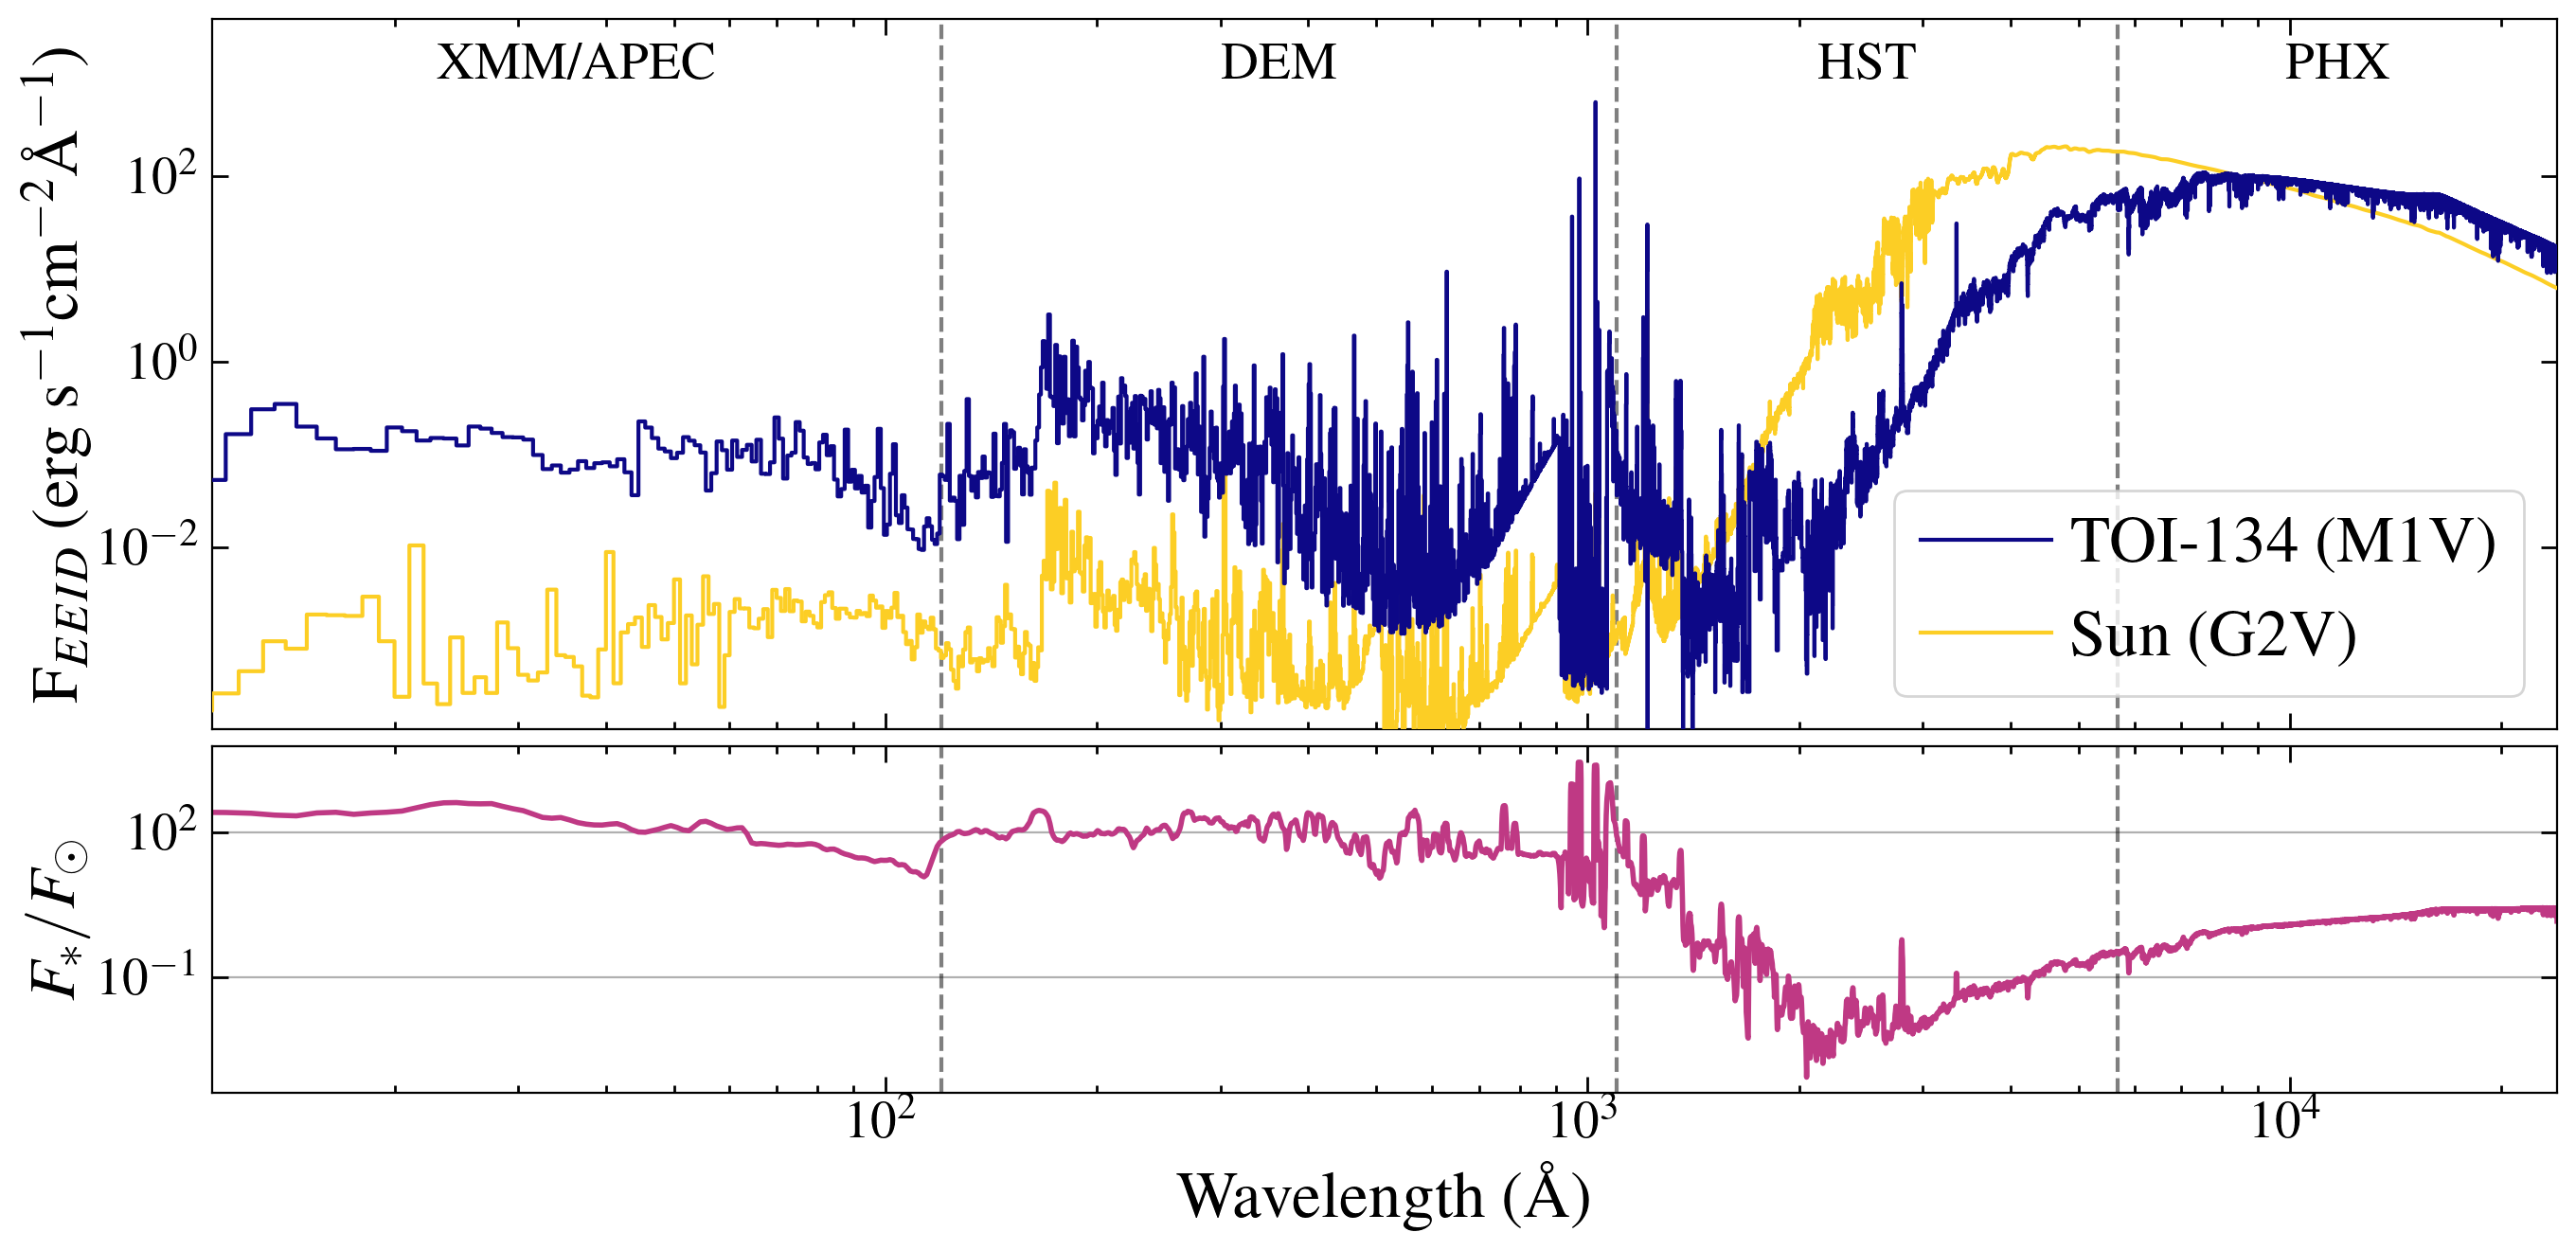

In [43]:

# cols = ['C0', 'C1', 'C2']
cols = [plt.cm.plasma(0),plt.cm.plasma(0.9), plt.cm.plasma(0.45)]

dstar = 25.18*u.pc
dsun = 1*u.au
lstar = 0.0723
# eeidau = 0.471*u.au
eeidau = (lstar**0.5)*1*u.au

solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
starscale = ((dstar.to(u.m))/(eeidau.to(u.m)))**2
# print(bb_scale)

# fig, ax = plt.subplots(figsize=(14, 7))
fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1,1,1]],figsize=(14, 7), sharex=True)


ax= axes[0]
ax.step(starw, starf*starscale, c=cols[0], label = 'TOI-134 (M1V)', zorder=12, where='mid')
ax.step(sw, sf, c=cols[1], label = 'Sun (G2V)', zorder=10, where='mid')
# ax.set_xlim(11, sw[-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.1e-4, 4.9e3)

# plt.axvline(900, ls='--')
# plt.axvline(4000, ls='--')


# plt.fill_between([0,900],0,10000, facecolor='b',alpha =0.3)
#plt.annotate('Thermosphere heating/removal', (12, 1e-12))

# plt.fill_between([900,4000],0,10000, facecolor='g', alpha =0.3)

# plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
#plt.annotate(' Photochemistry', (900, 1e-13))
# 
# plt.fill_between([4000,60000],0,10000, facecolor='r',alpha =0.3)
#plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3

xlims = (11, sw[-1])
ax.set_xlim(xlims[0], xlims[1])
divlines = (120, 1100, 5690)
[ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

labels = ['XMM/APEC', 'DEM', 'HST', 'PHX']
labpos = np.sort(np.hstack((xlims, divlines)))

for i, label in enumerate(labels):
    label_x = (labpos[i]*labpos[i+1])**0.5
    ax.annotate(label, (label_x, label_y), ha='center', va='center')


# plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('XMM', (10, label_y))

# plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('APEC', (75, label_y), ha='center')

# plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('EUV Model', (350, label_y), ha='center')

# plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('HST', (1900, label_y))

# plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('PHOENIX', (8000, label_y))
# plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
# plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
# plt.annotate('Optical/IR' ,(6000, label_y), size=25)

ax.legend(fontsize=25, loc=4,frameon=True)

# mplcyberpunk.add_glow_effects()
# mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()

# ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)

ax1 = axes[1]
ax1.set_xlabel('Wavelength (\AA)', size=25)
[ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]


mask = (starw> sw[0]) & (starw < sw[-1])
fnew = interp1d(starw[mask], starf[mask], fill_value='extrapolate')(sw)
fnew = fnew*starscale.value
ratio = fnew/sf
ratio = convolve(ratio,Box1DKernel(10))
ax1.plot(sw, ratio, c=cols[2], lw=2)
# ax1.set_ylim(0, 1000)

ax1.set_yscale('log')
# ax1.set_ylim(1e-3, 2e3)
ax1.set_ylabel('$F_*/F_{\odot}$', size=25)
# ax1.axhline(1, ls='--', c='k', alpha=0.5)

ax1.grid(axis='y')
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)


plt.savefig('plots/toi-134_v_sun.pdf')